**Classificação de Fácies**

In [ ]:
#importanto bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option('display.max_rows',10)

# 1. Pré-Processamento e Análise dos dados

In [ ]:
!git clone https://github.com/marcuslucamaral/models_ml.git

Mounted at /content/drive


In [ ]:
data_facies = pd.read_csv('models_ml/blob/main/facies_vectors.csv')

In [ ]:
# mudando a profundidade ded posicao
data_facies.insert(0,'Depth', data_facies.pop('Depth'))

Os targets que nos permitiram fazer a Classificação de fácies será:
1. perfil de raio gama (GR),
2. perfil de resistividade (ILD_log10),
3. efeito fotoelétrico (PE),
4. diferença de porosidade de densidade de nêutrons e porosidade média de densidade de nêutrons (DeltaPHI e PHIND)

Duas variáveis de restrição geológica: indicador não marítimo-marinho (NM_M) e posição relativa (RELPOS).

As nove fácies discretas (classes de rochas) são:
1. Nonmarine sandstone
2. Nonmarine coarse siltstone
3. Nonmarine fine siltstone
4. Marine siltstone and shale
5. Mudstone (limestone)
6. Wackestone (limestone)
7. Dolomite
8. Packstone-grainstone (limestone)
9. Phylloid-algal bafflestone (limestone)

In [ ]:
data_facies

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,2793.0,3,A1 SH,SHRIMPLIN,77.450,0.664,9.900,11.915,4.600,1,1.000
1,2793.5,3,A1 SH,SHRIMPLIN,78.260,0.661,14.200,12.565,4.100,1,0.979
2,2794.0,3,A1 SH,SHRIMPLIN,79.050,0.658,14.800,13.050,3.600,1,0.957
3,2794.5,3,A1 SH,SHRIMPLIN,86.100,0.655,13.900,13.115,3.500,1,0.936
4,2795.0,3,A1 SH,SHRIMPLIN,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,3120.5,5,C LM,CHURCHMAN BIBLE,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,3121.0,5,C LM,CHURCHMAN BIBLE,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,3121.5,5,C LM,CHURCHMAN BIBLE,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,3122.0,5,C LM,CHURCHMAN BIBLE,51.469,0.965,3.083,7.708,3.152,2,0.661


In [ ]:
data_facies[data_facies['Facies']==4]

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
62,2824.0,4,A1 LM,SHRIMPLIN,47.480,0.676,16.500,12.890,3.700,2,0.630
63,2824.5,4,A1 LM,SHRIMPLIN,61.100,0.671,15.200,11.785,3.700,2,0.611
64,2825.0,4,A1 LM,SHRIMPLIN,64.820,0.680,9.100,8.970,4.500,2,0.574
65,2825.5,4,A1 LM,SHRIMPLIN,55.770,0.710,6.100,8.930,5.100,2,0.556
66,2826.0,4,A1 LM,SHRIMPLIN,62.220,0.744,4.300,9.215,5.500,2,0.537
...,...,...,...,...,...,...,...,...,...,...,...
3843,2966.5,4,A1 LM,CHURCHMAN BIBLE,72.313,0.855,3.365,10.160,3.098,2,0.141
3844,2967.0,4,A1 LM,CHURCHMAN BIBLE,73.313,0.905,3.429,9.657,3.234,2,0.130
3845,2967.5,4,A1 LM,CHURCHMAN BIBLE,73.375,0.952,2.949,8.037,3.740,2,0.120
3846,2968.0,4,A1 LM,CHURCHMAN BIBLE,70.063,1.008,2.203,5.805,4.242,2,0.109


In [ ]:
#obtendo as informacoes sobre os dados
data_facies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      4149 non-null   float64
 1   Facies     4149 non-null   int64  
 2   Formation  4149 non-null   object 
 3   Well Name  4149 non-null   object 
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [ ]:
data_facies['Facies'].unique()

array([3, 2, 8, 6, 7, 4, 5, 9, 1])

In [ ]:
# transformanndo well name e a formacao em tipos categoricos
data_facies['Well Name'] = data_facies['Well Name'].astype('category')
data_facies['Formation'] = data_facies['Formation'].astype('category')
print(data_facies['Well Name'].unique())

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN',
                          'Recruit F9', 'SHANKLE', 'SHRIMPLIN']


In [ ]:
#verificando se ha dados faltantes
data_facies.isnull().sum()

Depth          0
Facies         0
Formation      0
Well Name      0
GR             0
            ... 
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
Length: 11, dtype: int64

In [ ]:
#verificando o numero de atributos e instancias
data_facies.shape

(4149, 11)

In [ ]:
# 1=sandstone  2=c_siltstone   3=f_siltstone
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors

In [ ]:
pe_mask = data_facies['PE'].notnull().values
data_facies = data_facies[pe_mask]

In [ ]:
data_facies.shape

(3232, 11)

In [ ]:
facies_color_map = {}

for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

data_facies.loc[:,'FaciesLabels'] = data_facies.apply(lambda row : label_facies(row, facies_labels), axis = 1)
data_facies.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Depth,Facies,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,2875.824567,4.422030,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,131.006274,2.504243,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,2573.500000,1.000000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2791.000000,2.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,2893.500000,4.000000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,2980.000000,6.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,3122.500000,9.000000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [ ]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

In [ ]:
#obtendo informacoes sobre os nomes dos pocos
data_facies['Well Name'].unique()

['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN',
                          'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

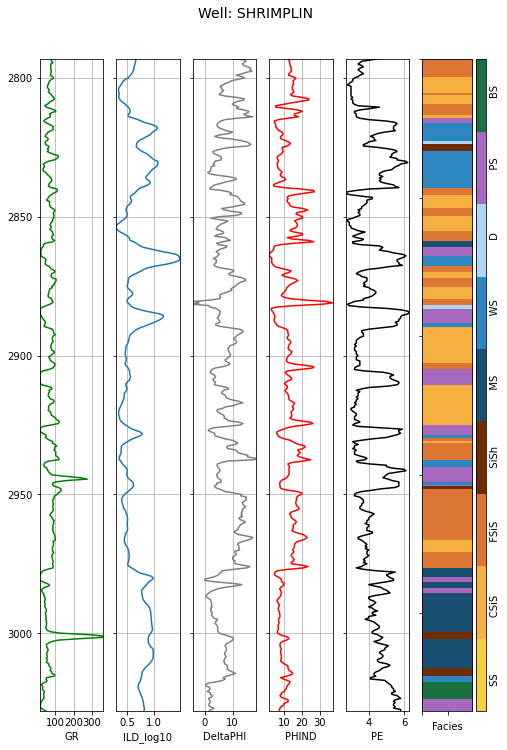

In [ ]:
make_facies_log_plot(
                     data_facies[data_facies['Well Name'] == 'SHRIMPLIN'],
                     facies_colors
                    )

from google.colab import files
plt.savefig("shrimplin.eps",format='eps', dpi=1200)
#files.download("shrimplin.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

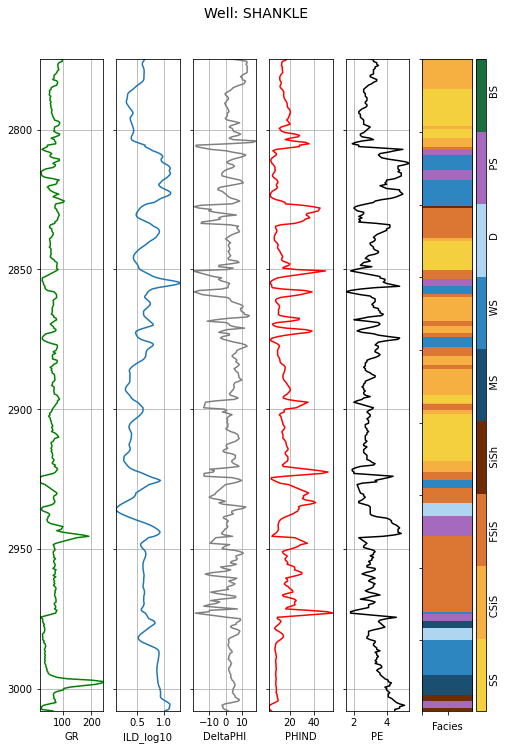

In [ ]:
make_facies_log_plot(
                     data_facies[data_facies['Well Name'] == 'SHANKLE'],
                     facies_colors
                    )
plt.savefig("shankle.eps",format='eps', dpi=1200)
files.download("shankle.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

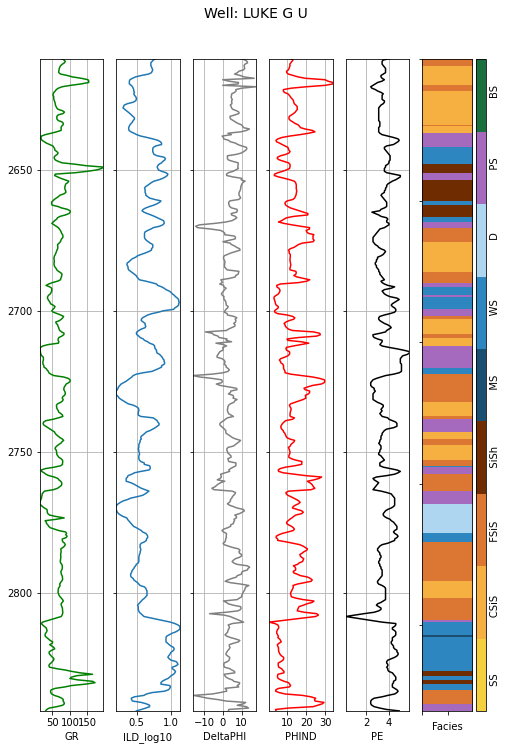

In [ ]:
make_facies_log_plot(
                     data_facies[data_facies['Well Name'] == 'LUKE G U'],
                     facies_colors
                    )
plt.savefig("luke_g_u.eps",format='eps', dpi=1200)
files.download("luke_g_u.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

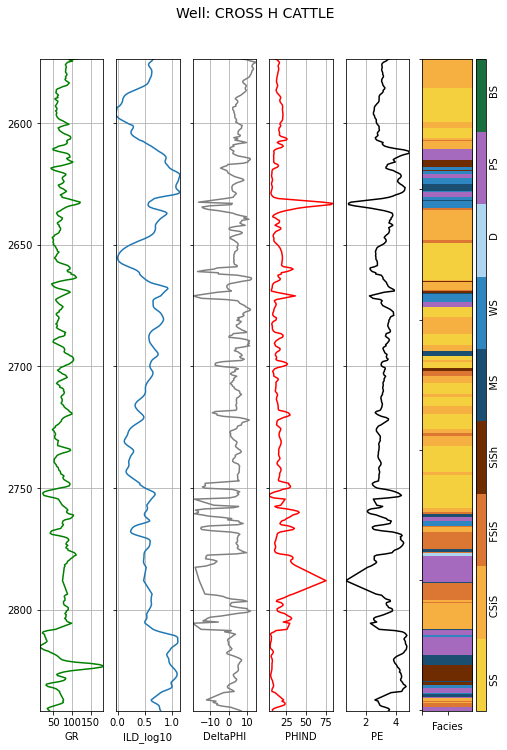

In [ ]:
make_facies_log_plot(data_facies[data_facies['Well Name']== 'CROSS H CATTLE'],
                     facies_colors
                    )
plt.savefig("cross_h_cattle.eps",format='eps', dpi=1200)
files.download("cross_h_cattle.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

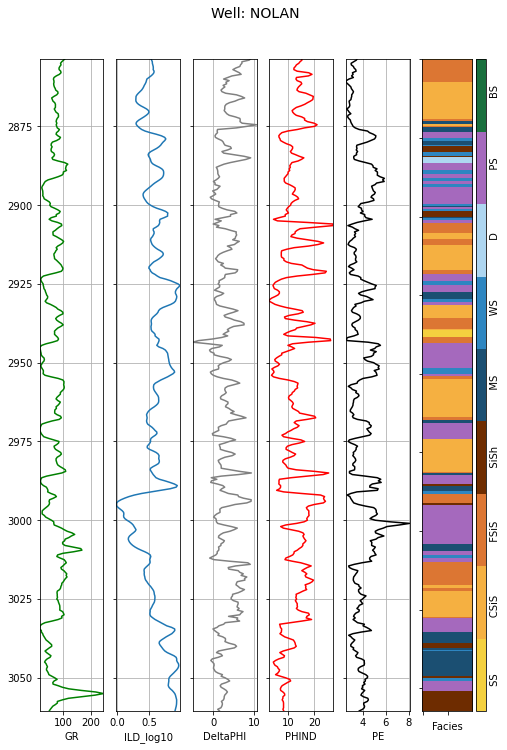

In [ ]:
make_facies_log_plot(data_facies[data_facies['Well Name'] == 'NOLAN'],
                     facies_colors
                    )
plt.savefig("nolan.eps",format='eps', dpi=1200)
files.download("nolan.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

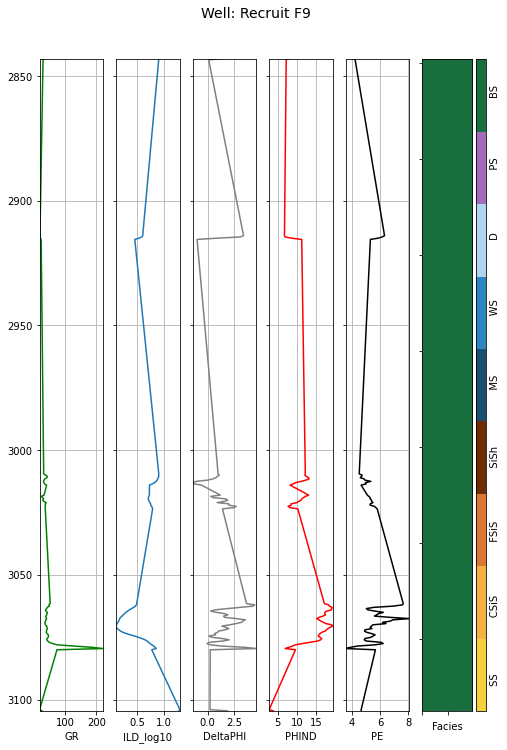

In [ ]:
make_facies_log_plot(data_facies[data_facies['Well Name'] == 'Recruit F9'],
                     facies_colors)
plt.savefig("recruit_f9.eps",format='eps', dpi=1200)
files.download("recruit_f9.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

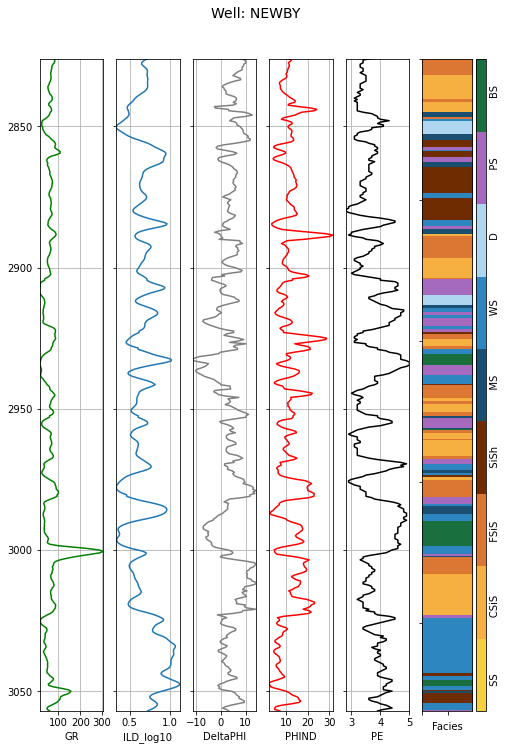

In [ ]:
make_facies_log_plot(data_facies[data_facies['Well Name'] == 'NEWBY'],
                     facies_colors)
plt.savefig("newby.eps",format='eps', dpi=1200)
files.download("newby.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

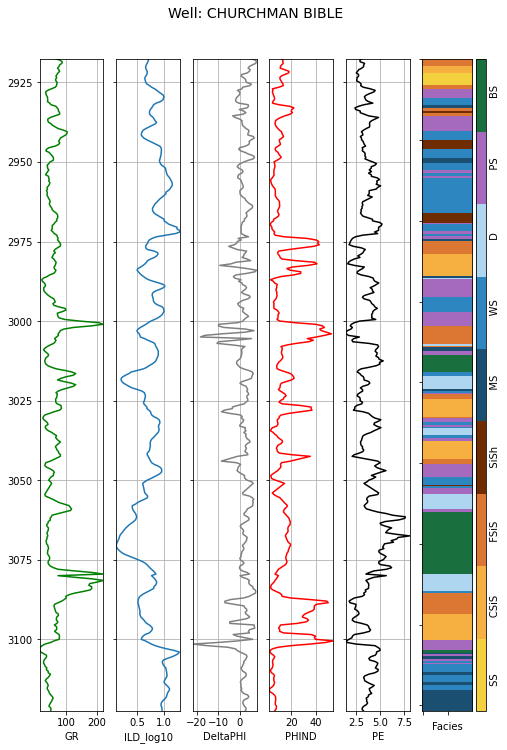

In [ ]:
make_facies_log_plot(data_facies[data_facies['Well Name'] == 'CHURCHMAN BIBLE'],
                     facies_colors
                    )
plt.savefig("churchman_bible.eps",format='eps', dpi=1200)
files.download("churchman_bible.eps")

In [ ]:
# contagem do numero de entradas por cada facie
facies_contadas = data_facies['Facies'].value_counts().sort_index()
facies_contadas.index = facies_labels

In [ ]:
data_facies.head()

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,2793.0,3,A1 SH,SHRIMPLIN,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,2793.5,3,A1 SH,SHRIMPLIN,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,2794.0,3,A1 SH,SHRIMPLIN,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,2794.5,3,A1 SH,SHRIMPLIN,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,2795.0,3,A1 SH,SHRIMPLIN,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS


<Figure size 1440x1440 with 0 Axes>

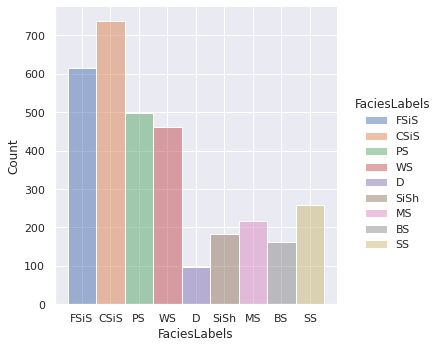

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20));
sns.set_theme(style="dark");
sns.displot(data = data_facies, x = 'FaciesLabels', hue = 'FaciesLabels');
plt.grid();
#plt.savefig("histogram_facies.eps",format='eps', dpi=1200)
#files.download("histogram_facies.eps")
#sns.histplot(data = data_facies, x = 'Formation', hue = 'Formation',shrink=.8, alpha=.8, legend=False)
#f.tight_layout();

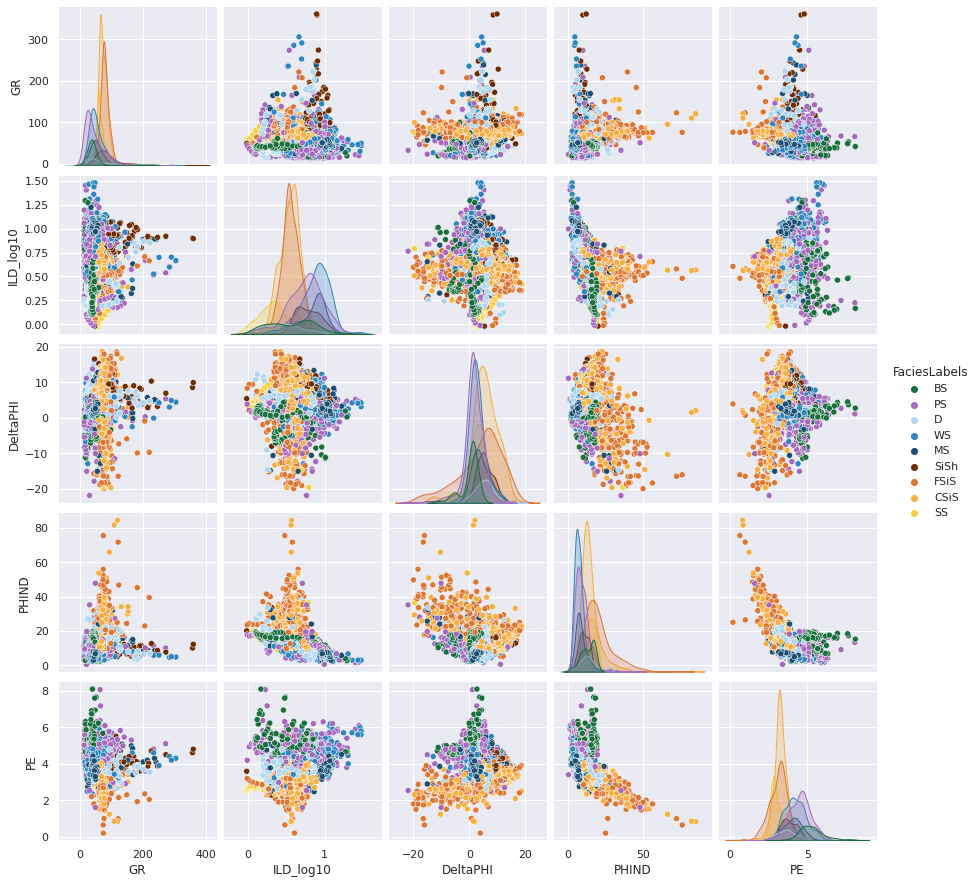

In [ ]:
# salva as configuracoes do plot
inline_rc = dict(mlp.rcParams)

sns.set()
sns.pairplot(data_facies.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis = 1),
             hue = 'FaciesLabels', palette = facies_color_map,
             hue_order = list(reversed(facies_labels))
            )

# volta para o padrão do matplotlib

#mlp.rcParams.update(inline_rc)
#plt.savefig("correlation.eps",format='eps', dpi=1200,transparent=True)
#files.download("correlation.eps")

# 2. Preparação dos dados para ML

In [ ]:
blind = data_facies[data_facies['Well Name'] == 'SHANKLE']
training_data = data_facies[data_facies['Well Name'] != 'SHANKLE']

In [ ]:
# extraindo target
target_facies = training_data['Facies'].values

# estraindo a feature

feature_facies = training_data.drop(['Formation','Well Name','Depth','Facies','FaciesLabels'], axis = 1)

In [ ]:
feature_facies.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,66.249445,0.644637,3.754963,13.118929,3.805693,1.523895,0.523057
std,31.610849,0.241922,5.045916,7.389665,0.894118,0.499518,0.287499
min,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,46.081500,0.497000,1.300000,8.165000,3.200000,1.000000,0.276500
50%,65.541000,0.627000,3.581000,11.900000,3.600000,2.000000,0.529000
75%,80.714000,0.812323,6.500000,16.144000,4.400000,2.000000,0.771500
max,361.150000,1.480000,18.500000,84.400000,8.094000,2.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(feature_facies)
feature_escalonada = scaler.transform(feature_facies)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
                                                    feature_escalonada,
                                                    target_facies,
                                                    test_size = 0.2,
                                                    random_state = 42
                                                   )

In [ ]:
# tecnicas de ML a serem usadas
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# metodo de procura de hiperparametros
from sklearn.model_selection import GridSearchCV

# visualizacao do metodo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
#from classification_utilities import display_cm, display_adj_cm

As métricas que serão ultilizadas são:

1. Precisão

2. Revocação

3. Acurácia

4. F1 - score

## 2 SVM

In [ ]:
sv_classifier = SVC(random_state = 0)

In [ ]:
sv_classifier.fit(x_train,y_train)

SVC(random_state=0)

In [ ]:
facies_preditas_svm = sv_classifier.predict(x_test)

In [ ]:
from __future__ import print_function
import numpy as np


def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):
    """Display confusion matrix with labels, along with
       metrics such as Recall, Precision and F1 score.
       Based on Zach Guo's print_cm gist at
       https://gist.github.com/zachguo/10296432
    """

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)

    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0

    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision

    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + " Pred", end=' ')
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)):
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))

    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)


def display_adj_cm(
        cm, labels, adjacent_facies, hide_zeros=False,
        display_metrics=False):
    """This function displays a confusion matrix that counts
       adjacent facies as correct.
    """
    adj_cm = np.copy(cm)

    for i in np.arange(0,cm.shape[0]):
        for j in adjacent_facies[i]:
            adj_cm[i][i] += adj_cm[i][j]
            adj_cm[i][j] = 0.0

    display_cm(adj_cm, labels, hide_zeros,
                             display_metrics)

In [ ]:
conf_svm = confusion_matrix(y_test, facies_preditas_svm)
display_cm(conf_svm, facies_labels, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    19    19     1                                        39
     CSiS         102    28                                       130
     FSiS          33    49           1                 1          84
     SiSh           1          24           6           2          33
       MS           2     1     2     2    42     1    10          60
       WS                       7          43     2    19     1    72
        D                       1                 9     7          17
       PS                 2     1     2    22          56     5    88
       BS                                   1          11    22    34


In [ ]:
conf_svm = confusion_matrix(y_test, facies_preditas_svm)
display_cm(conf_svm, facies_labels,display_metrics = True, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    19    19     1                                        39
     CSiS         102    28                                       130
     FSiS          33    49           1                 1          84
     SiSh           1          24           6           2          33
       MS           2     1     2     2    42     1    10          60
       WS                       7          43     2    19     1    72
        D                       1                 9     7          17
       PS                 2     1     2    22          56     5    88
       BS                                   1          11    22    34

Precision  1.00  0.65  0.60  0.69  0.40  0.38  0.75  0.53  0.79  0.60
   Recall  0.49  0.78  0.58  0.73  0.03  0.60  0.53  0.64  0.65  0.59
       F1  0.66  0.71  0.59  0.71  0.06  0.46  0.62  0.58  0.71  0.56


In [ ]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [ ]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            total_correct += conf[i][j]
    return total_correct / sum(sum(conf))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
display_adj_cm(conf_svm, facies_labels, adjacent_facies,
              display_metrics = True, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         130                                             130
     FSiS                82           1                 1          84
     SiSh           1          24           6           2          33
       MS           2     1          46           1    10          60
       WS                       7          64                 1    72
        D                       1                16                17
       PS                 2     1     2                83          88
       BS                                   1                33    34

Precision  1.00  0.98  0.95  0.73  0.94  0.90  0.94  0.86  0.97  0.93
   Recall  0.97  1.00  0.98  0.73  0.77  0.89  0.94  0.94  0.97  0.93
       F1  0.99  0.99  0.96  0.73  0.84  0.90  0.94  0.90  0.97  0.93


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_svm)}. \n',
      f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_svm,adjacent_facies)}'
     )

A acurácia da classificação de fáceis é 0.585278276481149. 
 A acurácia da classificação de fáceis adjacentes é 0.926391382405745


## 3. MLP

Matriz de Confusão

In [ ]:
mlp_classifier = MLPClassifier(random_state = 0)
mlp_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(random_state=0)

In [ ]:
predict_mlp = mlp_classifier.predict(x_test)

In [ ]:
conf_mlp = confusion_matrix(y_test, predict_mlp)
display_cm(conf_mlp, facies_labels, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    22    16     1                                        39
     CSiS     1   100    28                             1         130
     FSiS          26    56           1                 1          84
     SiSh                 1    25     2     3           2          33
       MS           1     2     5    16    27     1     8          60
       WS                      11     8    35     3    13     2    72
        D                       1                10     5     1    17
       PS                 2     1     3    22     1    51     8    88
       BS                                   1           6    27    34


In [ ]:
display_cm(conf_mlp, facies_labels,
           display_metrics = True, hide_zeros = True
          )

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    22    16     1                                        39
     CSiS     1   100    28                             1         130
     FSiS          26    56           1                 1          84
     SiSh                 1    25     2     3           2          33
       MS           1     2     5    16    27     1     8          60
       WS                      11     8    35     3    13     2    72
        D                       1                10     5     1    17
       PS                 2     1     3    22     1    51     8    88
       BS                                   1           6    27    34

Precision  0.96  0.70  0.62  0.58  0.53  0.40  0.67  0.59  0.71  0.62
   Recall  0.56  0.77  0.67  0.76  0.27  0.49  0.59  0.58  0.79  0.61
       F1  0.71  0.73  0.64  0.66  0.36  0.44  0.62  0.58  0.75  0.61


In [ ]:
display_adj_cm(conf_mlp, facies_labels, adjacent_facies,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         129                                   1         130
     FSiS                82           1                 1          84
     SiSh                 1    27           3           2          33
       MS           1     2          48           1     8          60
       WS                      11          59                 2    72
        D                       1                15           1    17
       PS                 2     1     3                82          88
       BS                                   1                33    34

Precision  1.00  0.99  0.93  0.68  0.92  0.94  0.94  0.87  0.92  0.93
   Recall  0.97  0.99  0.98  0.82  0.80  0.82  0.88  0.93  0.97  0.92
       F1  0.99  0.99  0.95  0.74  0.86  0.87  0.91  0.90  0.94  0.92


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_mlp)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_mlp,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.6140035906642729. 
 A acurácia da classificação de fáceis adjacentes é 0.9210053859964094


## 3 Logistic Regression

In [ ]:
logistic_classification = LogisticRegression(random_state = 0)
logistic_classification.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
predict_logistic = logistic_classification.predict(x_test)

In [ ]:
conf_logistic = confusion_matrix(y_test, predict_logistic)
display_cm(conf_logistic, facies_labels, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    24    14     1                                        39
     CSiS     3   101    25                             1         130
     FSiS          30    51           2                 1          84
     SiSh                 1    22     1     6           3          33
       MS           2     1     5     3    37     1    11          60
       WS                       9     1    36     5    20     1    72
        D                       2     1     1     8     5          17
       PS           1     1     4     3    22     1    46    10    88
       BS                                   2          13    19    34


In [ ]:
conf_logistic = confusion_matrix(y_test, predict_logistic)
display_cm(conf_logistic, facies_labels,
           hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    24    14     1                                        39
     CSiS     3   101    25                             1         130
     FSiS          30    51           2                 1          84
     SiSh                 1    22     1     6           3          33
       MS           2     1     5     3    37     1    11          60
       WS                       9     1    36     5    20     1    72
        D                       2     1     1     8     5          17
       PS           1     1     4     3    22     1    46    10    88
       BS                                   2          13    19    34

Precision  0.89  0.68  0.64  0.52  0.27  0.35  0.53  0.46  0.63  0.55
   Recall  0.62  0.78  0.61  0.67  0.05  0.50  0.47  0.52  0.56  0.56
       F1  0.73  0.73  0.62  0.59  0.08  0.41  0.50  0.49  0.59  0.54


In [ ]:
display_adj_cm(conf_logistic,facies_labels, adjacent_facies,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         129                                   1         130
     FSiS                81           2                 1          84
     SiSh                 1    23           6           3          33
       MS           2     1          45           1    11          60
       WS                       9          62                 1    72
        D                       2     1          14                17
       PS           1     1     4     3                79          88
       BS                                   2                32    34

Precision  1.00  0.98  0.95  0.61  0.88  0.89  0.93  0.83  0.97  0.91
   Recall  0.97  0.99  0.96  0.70  0.75  0.86  0.82  0.90  0.94  0.90
       F1  0.99  0.98  0.96  0.65  0.81  0.87  0.87  0.86  0.96  0.90


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_logistic)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_logistic,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.5565529622980251. 
 A acurácia da classificação de fáceis adjacentes é 0.9030520646319569


## 4 KNN - Classificação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [ ]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
predict_knn = knn_classifier.predict(x_test)

In [ ]:
conf_knn = confusion_matrix(y_test,predict_knn)
display_cm(conf_knn, facies_labels, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    30     8     1                                        39
     CSiS         108    22                                       130
     FSiS     2    22    59                             1          84
     SiSh           1          28           3           1          33
       MS     1     1     2     5    25    17     1     8          60
       WS                      12     6    40     3     6     5    72
        D                       1     2          11     3          17
       PS                 2     3     3    18          58     4    88
       BS                                   1           4    29    34


In [ ]:
conf_knn = confusion_matrix(y_test,predict_knn)
display_cm(conf_knn, facies_labels,
           hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    30     8     1                                        39
     CSiS         108    22                                       130
     FSiS     2    22    59                             1          84
     SiSh           1          28           3           1          33
       MS     1     1     2     5    25    17     1     8          60
       WS                      12     6    40     3     6     5    72
        D                       1     2          11     3          17
       PS                 2     3     3    18          58     4    88
       BS                                   1           4    29    34

Precision  0.91  0.77  0.69  0.57  0.69  0.51  0.73  0.72  0.76  0.70
   Recall  0.77  0.83  0.70  0.85  0.42  0.56  0.65  0.66  0.85  0.70
       F1  0.83  0.80  0.69  0.68  0.52  0.53  0.69  0.69  0.81  0.69


In [ ]:
conf_knn = confusion_matrix(y_test,predict_knn)
display_adj_cm(conf_knn, facies_labels, adjacent_facies,
               hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         130                                             130
     FSiS     2          81                             1          84
     SiSh           1          28           3           1          33
       MS     1     1     2          47           1     8          60
       WS                      12          55                 5    72
        D                       1     2          14                17
       PS                 2     3     3                80          88
       BS                                   1                33    34

Precision  0.93  0.98  0.94  0.64  0.90  0.93  0.93  0.89  0.87  0.91
   Recall  0.97  1.00  0.96  0.85  0.78  0.76  0.82  0.91  0.97  0.91
       F1  0.95  0.99  0.95  0.73  0.84  0.84  0.87  0.90  0.92  0.91


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_knn)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_knn,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.696588868940754. 
 A acurácia da classificação de fáceis adjacentes é 0.9084380610412927


## 5 Gaussian Classifier

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic

In [ ]:
gaussian_classifier = GaussianProcessClassifier(kernel = None,
                                                   random_state=0)
gaussian_classifier.fit(x_train, y_train)

GaussianProcessClassifier(random_state=0)

In [ ]:
predict_gaussian = gaussian_classifier.predict(x_test)
conf_gaussian = confusion_matrix(y_test, predict_gaussian)
display_cm(conf_gaussian, facies_labels,
          hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    21    17     1                                        39
     CSiS         107    23                                       130
     FSiS     1    23    59                             1          84
     SiSh           1          25     1     4           2          33
       MS           2     1     5    14    26     1    11          60
       WS                      10     5    42     1    10     4    72
        D                       1                10     6          17
       PS                 2     3     2    18          57     6    88
       BS                                   1           7    26    34

Precision  0.95  0.71  0.69  0.57  0.64  0.46  0.83  0.61  0.72  0.66
   Recall  0.54  0.82  0.70  0.76  0.23  0.58  0.59  0.65  0.76  0.65
       F1  0.69  0.76  0.69  0.65  0.34  0.52  0.69  0.63  0.74  0.64


In [ ]:
display_adj_cm(conf_gaussian, facies_labels, adjacent_facies,
          hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         130                                             130
     FSiS     1          82                             1          84
     SiSh           1          26           4           2          33
       MS           2     1          45           1    11          60
       WS                      10          58                 4    72
        D                       1                16                17
       PS                 2     3     2                81          88
       BS                                   1                33    34

Precision  0.97  0.98  0.95  0.65  0.96  0.92  0.94  0.85  0.89  0.92
   Recall  0.97  1.00  0.98  0.79  0.75  0.81  0.94  0.92  0.97  0.91
       F1  0.97  0.99  0.96  0.71  0.84  0.86  0.94  0.89  0.93  0.91


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_gaussian)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_gaussian,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.6481149012567325. 
 A acurácia da classificação de fáceis adjacentes é 0.9138240574506283


## Hiperparametrizando os métodos Aplicados

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import accuracy_score

### Para SVM

In [ ]:
param_grid = [{'kernel' : ['rbf'],
               'C' : [0.0001,0.001,0.01,0.1,1,5,10,20,30],
               'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
               #'random_state' : [0, 1, 5, 10, 20, 30, 40, 42, 50, 60, 70, 80, 90, 100]
             }]

scores = ['accuracy']

svc = SVC()


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_svm.fit(x_train, y_train)
    predict_svm = clf_svm.predict(x_test)
    conf_svm = confusion_matrix(y_test, predict_svm)
    print('score: ' , clf_svm.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_svm))
    print('acuracia das camadas: ', accuracy(conf_svm))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_svm,adjacent_facies))
    print('melhores parametros: ', clf_svm.best_params_)



# Tuning hyper-parameters for accuracy

Fitting 4 folds for each of 72 candidates, totalling 288 fits
score:  0.7313580912648696
score de acuracia:  0.7163375224416517
acuracia das camadas:  0.7163375224416517
acuracia para camadas adjacentes:  0.9174147217235189
melhores parametros:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
param_grid = [{'kernel' : ['rbf'],
               'C' : [0.0001,0.001,0.01,0.1,1,5,10,20,30],
               'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
               #'random_state' : [0, 1, 5, 10, 20, 30, 40, 42, 50, 60, 70, 80, 90, 100]
             }]

scores = ['accuracy']

svc = SVC()


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_svm.fit(x_train, y_train)
    predict_svm = clf_svm.predict(x_test)
    conf_svm = confusion_matrix(y_test, predict_svm)
    print('score: ' , clf_svm.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_svm))
    print('acuracia das camadas: ', accuracy(conf_svm))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_svm,adjacent_facies))
    print('melhores parametros: ', clf_svm.best_params_)

In [ ]:
svm_hiperparametrizado = SVC(C= 10, gamma = 1, random_state = 0)

In [ ]:
svm_hiperparametrizado.fit(x_train, y_train)
predict_svm_hiper = svm_hiperparametrizado.predict(x_test)

In [ ]:
conf_svm_hiper = confusion_matrix(y_test, predict_svm_hiper)
display_cm(conf_svm_hiper, facies_labels, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    30     8     1                                        39
     CSiS     2   109    17                             2         130
     FSiS     2    23    55     3     1                            84
     SiSh           1          27     1     2           2          33
       MS           2     2     5    29    14           8          60
       WS                       7     8    45     1     9     2    72
        D                       1     2          10     3     1    17
       PS                 3     1     3    14          63     4    88
       BS                                               3    31    34


In [ ]:
display_cm(conf_svm_hiper, facies_labels, hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    30     8     1                                        39
     CSiS     2   109    17                             2         130
     FSiS     2    23    55     3     1                            84
     SiSh           1          27     1     2           2          33
       MS           2     2     5    29    14           8          60
       WS                       7     8    45     1     9     2    72
        D                       1     2          10     3     1    17
       PS                 3     1     3    14          63     4    88
       BS                                               3    31    34

Precision  0.88  0.76  0.71  0.61  0.66  0.60  0.91  0.70  0.82  0.72
   Recall  0.77  0.84  0.65  0.82  0.48  0.62  0.59  0.72  0.91  0.72
       F1  0.82  0.80  0.68  0.70  0.56  0.61  0.71  0.71  0.86  0.71


In [ ]:
display_adj_cm(conf_svm_hiper, facies_labels, adjacent_facies,
              display_metrics = True, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         128                                   2         130
     FSiS     2          78     3     1                            84
     SiSh           1          28           2           2          33
       MS           2     2          48                 8          60
       WS                       7          63                 2    72
        D                       1     2          13           1    17
       PS                 3     1     3                81          88
       BS                                                    34    34

Precision  0.95  0.98  0.93  0.70  0.89  0.97  1.00  0.87  0.92  0.92
   Recall  0.97  0.98  0.93  0.85  0.80  0.88  0.76  0.92  1.00  0.92
       F1  0.96  0.98  0.93  0.77  0.84  0.92  0.87  0.90  0.96  0.92


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_svm_hiper)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_svm_hiper,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.7163375224416517. 
 A acurácia da classificação de fáceis adjacentes é 0.9174147217235189


In [ ]:
conf_svm_hiper

array([[ 30,   8,   1,   0,   0,   0,   0,   0,   0],
       [  2, 109,  17,   0,   0,   0,   0,   2,   0],
       [  2,  23,  55,   3,   1,   0,   0,   0,   0],
       [  0,   1,   0,  27,   1,   2,   0,   2,   0],
       [  0,   2,   2,   5,  29,  14,   0,   8,   0],
       [  0,   0,   0,   7,   8,  45,   1,   9,   2],
       [  0,   0,   0,   1,   2,   0,  10,   3,   1],
       [  0,   0,   3,   1,   3,  14,   0,  63,   4],
       [  0,   0,   0,   0,   0,   0,   0,   3,  31]])

In [ ]:
param_grid = [{'kernel' : ['poly'],
               'C' : [0.0001,0.001,0.01,0.1,1,5,10,20,30],
               'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
               #'random_state' : [0, 1, 5, 10, 20, 30, 40, 42, 50, 60, 70, 80, 90, 100]
             }]

scores = ['accuracy']

svc = SVC()


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_svm.fit(x_train, y_train)
    predict_svm = clf_svm.predict(x_test)
    conf_svm = confusion_matrix(y_test, predict_svm)
    print('score: ' , clf_svm.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_svm))
    print('acuracia das camadas: ', accuracy(conf_svm))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_svm,adjacent_facies))
    print('melhores parametros: ', clf_svm.best_params_)

# Tuning hyper-parameters for accuracy

Fitting 4 folds for each of 72 candidates, totalling 288 fits


In [ ]:
param_grid = [{'kernel' : ['linear'],
               'C' : [0.0001,0.001,0.01,0.1,1,5,10,20,30],
               'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
               #'random_state' : [0, 1, 5, 10, 20, 30, 40, 42, 50, 60, 70, 80, 90, 100]
             }]

scores = ['accuracy']

svc = SVC()


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_svm.fit(x_train, y_train)
    predict_svm = clf_svm.predict(x_test)
    conf_svm = confusion_matrix(y_test, predict_svm)
    print('score: ' , clf_svm.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_svm))
    print('acuracia das camadas: ', accuracy(conf_svm))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_svm,adjacent_facies))
    print('melhores parametros: ', clf_svm.best_params_)

In [ ]:
param_grid = [{'kernel' : ['sigmoid'],
               'C' : [0.0001,0.001,0.01,0.1,1,5,10,20,30],
               'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
               #'random_state' : [0, 1, 5, 10, 20, 30, 40, 42, 50, 60, 70, 80, 90, 100]
             }]

scores = ['accuracy']

svc = SVC()


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_svm.fit(x_train, y_train)
    predict_svm = clf_svm.predict(x_test)
    conf_svm = confusion_matrix(y_test, predict_svm)
    print('score: ' , clf_svm.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_svm))
    print('acuracia das camadas: ', accuracy(conf_svm))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_svm,adjacent_facies))
    print('melhores parametros: ', clf_svm.best_params_)

### Para MLP

In [ ]:
param_grid = [{'hidden_layer_sizes' : [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       (5,5),(5,5,5), (10,10),(10,10,10), (15,15),(15,15,15), (20,20),(20,20,20), (30,30),(30,30,30),
                                       (40,40),(40,40,40), (50,50),(50,50,50), (60,60),(60,60,60),
                                      (70,70),(70,70,70), (80,80),(80,80,80), (90,90),(90,90,90), (100,100),(100,100,100)],
            'solver' : ['adam'],
            'activation' : ['identity','logistic','tanh','relu'],
            'learning_rate' : ['constant', 'invscaling', 'adaptive'],
            'random_state' : [0, 1, 5, 10, 20, 30, 40, 42, 50, 60, 70, 80, 90, 100]
          }]

scores = ['accuracy']
mlp = MLPClassifier()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_mlp.fit(x_train, y_train)
    predict_mlp = clf_mlp.predict(x_test)
    conf_mlp = confusion_matrix(y_test, predict_mlp)
    print('score: ' , clf_mlp.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_mlp))
    print('acuracia das camadas: ', accuracy(conf_mlp))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_mlp,adjacent_facies))
    print('melhores parametros: ', clf_mlp.best_params_)


# Tuning hyper-parameters for accuracy

Fitting 4 folds for each of 6048 candidates, totalling 24192 fits


KeyboardInterrupt: ignored

In [ ]:
mlp_hiperparametrizado = MLPClassifier(activation= 'tanh', hidden_layer_sizes = (100, 100, 100), learning_rate = 'constant', random_state=  50, solver = 'adam')

In [ ]:
mlp_hiperparametrizado.fit(x_train, y_train)
mlp_predict_hiperparametrizado = mlp_hiperparametrizado.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
conf_hiper_mlp = confusion_matrix(y_test, mlp_predict_hiperparametrizado)
display_cm(conf_hiper_mlp, facies_labels, hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    27    12                                              39
     CSiS     1   112    17                                       130
     FSiS     3    21    59           1                            84
     SiSh           1          25     1     3           3          33
       MS                 3     4    29    13     1    10          60
       WS                       5     8    48     2     6     3    72
        D                             2          10     4     1    17
       PS                 2     4     4    16          57     5    88
       BS                                   1           2    31    34

Precision  0.87  0.77  0.73  0.66  0.64  0.59  0.77  0.70  0.78  0.72
   Recall  0.69  0.86  0.70  0.76  0.48  0.67  0.59  0.65  0.91  0.71
       F1  0.77  0.81  0.72  0.70  0.55  0.63  0.67  0.67  0.84  0.71


In [ ]:
display_adj_cm(conf_hiper_mlp ,facies_labels, adjacent_facies,
              display_metrics = True, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    39                                                    39
     CSiS         130                                             130
     FSiS     3          80           1                            84
     SiSh           1          26           3           3          33
       MS                 3          46           1    10          60
       WS                       5          64                 3    72
        D                             2          14           1    17
       PS                 2     4     4                78          88
       BS                                   1                33    34

Precision  0.93  0.99  0.94  0.74  0.87  0.94  0.93  0.86  0.89  0.92
   Recall  1.00  1.00  0.95  0.79  0.77  0.89  0.82  0.89  0.97  0.92
       F1  0.96  1.00  0.95  0.76  0.81  0.91  0.87  0.87  0.93  0.92


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_hiper_mlp)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_hiper_mlp,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.7145421903052065. 
 A acurácia da classificação de fáceis adjacentes é 0.9156193895870736


In [ ]:
conf_hiper_mlp

array([[ 27,  12,   0,   0,   0,   0,   0,   0,   0],
       [  1, 112,  17,   0,   0,   0,   0,   0,   0],
       [  3,  21,  59,   0,   1,   0,   0,   0,   0],
       [  0,   1,   0,  25,   1,   3,   0,   3,   0],
       [  0,   0,   3,   4,  29,  13,   1,  10,   0],
       [  0,   0,   0,   5,   8,  48,   2,   6,   3],
       [  0,   0,   0,   0,   2,   0,  10,   4,   1],
       [  0,   0,   2,   4,   4,  16,   0,  57,   5],
       [  0,   0,   0,   0,   0,   1,   0,   2,  31]])

### Para Logistic Regression

In [ ]:
param_grid = [{'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
            'penalty' : ['none','l1','l2','elasticnet'],
            'C' : [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 1, 0.1,0.2, 0.01
                   ,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.001],

          }]

scores = ['accuracy']
logistic = LogisticRegression()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_logistic = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_logistic.fit(x_train, y_train)
    predict_logistic = clf_logistic.predict(x_test)
    conf_logistic = confusion_matrix(y_test, predict_logistic)
    print('score: ' , clf_logistic.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_logistic))
    print('acuracia das camadas: ', accuracy(conf_logistic))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_logistic,adjacent_facies))
    print('melhores parametros: ', clf_logistic.best_params_)

# Tuning hyper-parameters for accuracy

Fitting 4 folds for each of 440 candidates, totalling 1760 fits
score:  0.583096269842295
score de acuracia:  0.5619389587073609
acuracia das camadas:  0.5619389587073609
acuracia para camadas adjacentes:  0.895870736086176
melhores parametros:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
792 fits failed out of a total of 1760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
88 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is

In [ ]:
logistic_hiperparametrizado = LogisticRegression(C =0.1, penalty = 'l2',
                                                 solver = 'newton-cg')

In [ ]:
logistic_hiperparametrizado.fit(x_train, y_train)
logistic_hiperparametrizado_predict = logistic_hiperparametrizado.predict(x_test)

In [ ]:
conf_hiper_logistic = confusion_matrix(y_test, logistic_hiperparametrizado_predict)
display_cm(conf_hiper_logistic, facies_labels, hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    21    17     1                                        39
     CSiS     1   106    22                             1         130
     FSiS          33    48           1                 2          84
     SiSh                 1    21     1     7           3          33
       MS           2     1     4     2    37     1    13          60
       WS                      12          37     2    20     1    72
        D                       2                 7     8          17
       PS           1     1     4     2    21     1    51     7    88
       BS                                   2          12    20    34

Precision  0.95  0.67  0.65  0.49  0.33  0.36  0.64  0.46  0.71  0.57
   Recall  0.54  0.82  0.57  0.64  0.03  0.51  0.41  0.58  0.59  0.56
       F1  0.69  0.73  0.61  0.55  0.06  0.42  0.50  0.52  0.65  0.54


In [ ]:
display_adj_cm(conf_hiper_logistic ,facies_labels, adjacent_facies,
              display_metrics = True, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         129                                   1         130
     FSiS                81           1                 2          84
     SiSh                 1    22           7           3          33
       MS           2     1          43           1    13          60
       WS                      12          59                 1    72
        D                       2                15                17
       PS           1     1     4     2                80          88
       BS                                   2                32    34

Precision  1.00  0.98  0.95  0.55  0.93  0.87  0.94  0.81  0.97  0.90
   Recall  0.97  0.99  0.96  0.67  0.72  0.82  0.88  0.91  0.94  0.90
       F1  0.99  0.98  0.96  0.60  0.81  0.84  0.91  0.86  0.96  0.90


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_hiper_logistic)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_hiper_logistic,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.5565529622980251. 
 A acurácia da classificação de fáceis adjacentes é 0.9030520646319569


In [ ]:
conf_hiper_logistic

array([[ 21,  17,   1,   0,   0,   0,   0,   0,   0],
       [  1, 106,  22,   0,   0,   0,   0,   1,   0],
       [  0,  33,  48,   0,   1,   0,   0,   2,   0],
       [  0,   0,   1,  21,   1,   7,   0,   3,   0],
       [  0,   2,   1,   4,   2,  37,   1,  13,   0],
       [  0,   0,   0,  12,   0,  37,   2,  20,   1],
       [  0,   0,   0,   2,   0,   0,   7,   8,   0],
       [  0,   1,   1,   4,   2,  21,   1,  51,   7],
       [  0,   0,   0,   0,   0,   2,   0,  12,  20]])

### KNN

In [ ]:
param_grid = [{'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15,17,18,19,20,21],
            #'weights' : ['uniform','distance'],
            'algorithm' : ['auto','ball_tree','kd_tree','brute'],
            'metric' : ['euclidian','manhattan','minkowski','chebyshev']
          }]

scores = ['accuracy']
knn = KNeighborsClassifier()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_knn.fit(x_train, y_train)
    predict_knn = clf_knn.predict(x_test)
    conf_knn = confusion_matrix(y_test, predict_knn)
    print('score: ' , clf_knn.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_knn))
    print('acuracia das camadas: ', accuracy(conf_knn))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_knn,adjacent_facies))
    print('melhores parametros: ', clf_knn.best_params_)

# Tuning hyper-parameters for accuracy

Fitting 4 folds for each of 336 candidates, totalling 1344 fits
score:  0.7340591620061222
score de acuracia:  0.7378815080789947
acuracia das camadas:  0.7378815080789947
acuracia para camadas adjacentes:  0.9192100538599641
melhores parametros:  {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 1}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
336 fits failed out of a total of 1344.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/

In [ ]:
knn_hiperparametrizado = KNeighborsClassifier(algorithm= 'brute', metric= 'manhattan', n_neighbors= 1)

In [ ]:
knn_hiperparametrizado.fit(x_train, y_train)
knn_hiperparametrizado_predict = knn_hiperparametrizado.predict(x_test)

In [ ]:
conf_hiper_knn = confusion_matrix(y_test, knn_hiperparametrizado_predict)
display_cm(conf_hiper_knn, facies_labels, hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    30     7     2                                        39
     CSiS         102    26                             2         130
     FSiS     1    16    63     3     1                            84
     SiSh           1          26           1           5          33
       MS           1     3     6    36     5           9          60
       WS                       3     6    47     3    10     3    72
        D                             1          12     3     1    17
       PS                 3     1     4    12     1    64     3    88
       BS                                               3    31    34

Precision  0.97  0.80  0.65  0.67  0.75  0.72  0.75  0.67  0.82  0.74
   Recall  0.77  0.78  0.75  0.79  0.60  0.65  0.71  0.73  0.91  0.74
       F1  0.86  0.79  0.70  0.72  0.67  0.69  0.73  0.70  0.86  0.74


In [ ]:
display_adj_cm(conf_hiper_knn ,facies_labels, adjacent_facies,
              display_metrics = True, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    37           2                                        39
     CSiS         128                                   2         130
     FSiS     1          79     3     1                            84
     SiSh           1          26           1           5          33
       MS           1     3          47                 9          60
       WS                       3          66                 3    72
        D                             1          15           1    17
       PS                 3     1     4                80          88
       BS                                                    34    34

Precision  0.97  0.98  0.91  0.79  0.89  0.99  1.00  0.83  0.89  0.92
   Recall  0.95  0.98  0.94  0.79  0.78  0.92  0.88  0.91  1.00  0.92
       F1  0.96  0.98  0.92  0.79  0.83  0.95  0.94  0.87  0.94  0.92


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_hiper_knn)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_hiper_knn,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.7378815080789947. 
 A acurácia da classificação de fáceis adjacentes é 0.9192100538599641


In [ ]:
conf_hiper_knn

array([[ 30,   7,   2,   0,   0,   0,   0,   0,   0],
       [  0, 102,  26,   0,   0,   0,   0,   2,   0],
       [  1,  16,  63,   3,   1,   0,   0,   0,   0],
       [  0,   1,   0,  26,   0,   1,   0,   5,   0],
       [  0,   1,   3,   6,  36,   5,   0,   9,   0],
       [  0,   0,   0,   3,   6,  47,   3,  10,   3],
       [  0,   0,   0,   0,   1,   0,  12,   3,   1],
       [  0,   0,   3,   1,   4,  12,   1,  64,   3],
       [  0,   0,   0,   0,   0,   0,   0,   3,  31]])

### Para Gaussiana rbf

In [ ]:
param_grid = [{
               "kernel": [RBF(length_scale) for length_scale in (1e-4,1e-3,1e-2,1e-1,1,10,1e2,1e3,1e-4)],
               "kernel": [RBF(length_scale_bounds) for length_scale_bounds in (1e-05, 100000.0)],
               "kernel": [RBF(l) for l in np.logspace(-1, 1, 2)]
          }]

scores = ['accuracy']
gaussian = GaussianProcessClassifier()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_gaussian = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_gaussian.fit(x_train, y_train)
    predict_gaussian = clf_gaussian.predict(x_test)
    conf_gaussian = confusion_matrix(y_test, predict_gaussian)
    print('score: ' , clf_gaussian.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_gaussian))
    print('acuracia das camadas: ', accuracy(conf_gaussian))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_gaussian,adjacent_facies))
    print('melhores parametros: ', clf_gaussian.best_params_)

# Tuning hyper-parameters for accuracy

Fitting 4 folds for each of 2 candidates, totalling 8 fits
score:  0.5853002186801671
score de acuracia:  0.6228748068006182
acuracia das camadas:  0.6228748068006182
acuracia para camadas adjacentes:  0.910355486862442
melhores parametros:  {'kernel': RBF(length_scale=10)}


In [ ]:
param_grid = [{
               #"kernel": [RBF(length_scale) for length_scale in (1e-4,1e-3,1e-2,1e-1,1,10,1e2,1e3,1e-4)],
               #"kernel": [RBF(length_scale_bounds) for length_scale_bounds in (1e-05, 100000.0)],
               "kernel": [RBF(length_scale,length_scale_bounds) for length_scale in (1e-4,1e-3,1e-2,1e-1,1,10,1e2,1e3,1e-4)
                                                                for length_scale_bounds in [(1e-02, 100000.0)]],
               #"kernel": [RBF(l) for l in np.logspace(-1, 1, 2)]
          }]

scores = ['accuracy']
gaussian = GaussianProcessClassifier()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_gaussian = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_gaussian.fit(x_train, y_train)
    predict_gaussian = clf_gaussian.predict(x_test)
    conf_gaussian = confusion_matrix(y_test, predict_gaussian)
    print('score: ' , clf_gaussian.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_gaussian))
    print('acuracia das camadas: ', accuracy(conf_gaussian))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_gaussian,adjacent_facies))
    print('melhores parametros: ', clf_gaussian.best_params_)

# Tuning hyper-parameters for accuracy

Fitting 4 folds for each of 9 candidates, totalling 36 fits
score:  0.5853002186801671
score de acuracia:  0.6228748068006182
acuracia das camadas:  0.6228748068006182
acuracia para camadas adjacentes:  0.910355486862442
melhores parametros:  {'kernel': RBF(length_scale=10)}


In [ ]:
gaussian_rbf_hiperparametrizado = GaussianProcessClassifier(kernel= RBF(length_scale=10))

In [ ]:
gaussian_rbf_hiperparametrizado.fit(x_train, y_train)
gaussian_rbf_hiperparametrizado_predict = gaussian_rbf_hiperparametrizado.predict(x_test)

In [ ]:
conf_hiper_gaussian_rbf = confusion_matrix(y_test, gaussian_rbf_hiperparametrizado_predict)
display_cm(conf_hiper_gaussian_rbf, facies_labels, hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    21    17     1                                        39
     CSiS         100    30                                       130
     FSiS          31    51     2                                  84
     SiSh           1          25     1     4           2          33
       MS           1     2     5     2    37     1    12          60
       WS                      14     1    39          16     2    72
        D                       3           1     5     8          17
       PS                 2     4     4    18          51     9    88
       BS                                   3           8    23    34

Precision  1.00  0.67  0.59  0.47  0.25  0.38  0.83  0.53  0.68  0.57
   Recall  0.54  0.77  0.61  0.76  0.03  0.54  0.29  0.58  0.68  0.57
       F1  0.70  0.71  0.60  0.58  0.06  0.45  0.43  0.55  0.68  0.55


In [ ]:
display_adj_cm(conf_hiper_gaussian_rbf ,facies_labels, adjacent_facies,
              display_metrics = True, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         130                                             130
     FSiS                82     2                                  84
     SiSh           1          26           4           2          33
       MS           1     2          44           1    12          60
       WS                      14          56                 2    72
        D                       3                14                17
       PS                 2     4     4                78          88
       BS                                   3                31    34

Precision  1.00  0.98  0.94  0.53  0.92  0.89  0.93  0.85  0.94  0.91
   Recall  0.97  1.00  0.98  0.79  0.73  0.78  0.82  0.89  0.91  0.90
       F1  0.99  0.99  0.96  0.63  0.81  0.83  0.87  0.87  0.93  0.90


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_hiper_gaussian_rbf)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_hiper_gaussian_rbf,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.5691202872531418. 
 A acurácia da classificação de fáceis adjacentes é 0.895870736086176


In [ ]:
conf_hiper_gaussian_rbf

array([[ 21,  17,   1,   0,   0,   0,   0,   0,   0],
       [  0, 100,  30,   0,   0,   0,   0,   0,   0],
       [  0,  31,  51,   2,   0,   0,   0,   0,   0],
       [  0,   1,   0,  25,   1,   4,   0,   2,   0],
       [  0,   1,   2,   5,   2,  37,   1,  12,   0],
       [  0,   0,   0,  14,   1,  39,   0,  16,   2],
       [  0,   0,   0,   3,   0,   1,   5,   8,   0],
       [  0,   0,   2,   4,   4,  18,   0,  51,   9],
       [  0,   0,   0,   0,   0,   3,   0,   8,  23]])

### Para Gaussiana Rational Quadratic

In [ ]:
param_grid = [{
    "kernel" : [RationalQuadratic(alpha, length_scale, length_scale_bounds)
                                        for alpha in (10,0.1,1,0.01)
                                        for length_scale in (10,0.1,0.01,0.001,0.0001)
                                        for length_scale_bounds in [(1e-5,1e5)]]
              }]
# scores for classification
scores = ['accuracy']
gaussian = GaussianProcessClassifier()


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_gaussian = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=4, verbose=3,n_jobs=-1,
                       scoring='%s' % score ) #n_jobs ->processamento de forma paralela # score -> métrica r
    clf_gaussian.fit(x_train, y_train)
    predict_gaussian = clf_gaussian.predict(x_test)
    conf_gaussian = confusion_matrix(y_test, predict_gaussian)
    print('score: ' , clf_gaussian.best_score_)
    print('score de acuracia: ', accuracy_score(y_test, predict_gaussian))
    print('acuracia das camadas: ', accuracy(conf_gaussian))
    print('acuracia para camadas adjacentes: ',accuracy_adjacent(conf_gaussian,adjacent_facies))
    print('melhores parametros: ', clf_gaussian.best_params_)

# Tuning hyper-parameters for accuracy

Fitting 4 folds for each of 20 candidates, totalling 80 fits
score:  0.6177924069652265
score de acuracia:  0.6398763523956723
acuracia das camadas:  0.6398763523956723
acuracia para camadas adjacentes:  0.9119010819165378
melhores parametros:  {'kernel': RationalQuadratic(alpha=10, length_scale=10)}


In [ ]:
gaussian_rational_hiperparametrizado = GaussianProcessClassifier(kernel= RationalQuadratic(alpha = 10,length_scale=10))

In [ ]:
gaussian_rational_hiperparametrizado.fit(x_train, y_train)
gaussian_rational_hiperparametrizado_predict = gaussian_rational_hiperparametrizado.predict(x_test)

In [ ]:
conf_hiper_gaussian_rational = confusion_matrix(y_test, gaussian_rational_hiperparametrizado_predict)
display_cm(conf_hiper_gaussian_rational, facies_labels, hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    21    17     1                                        39
     CSiS         103    27                                       130
     FSiS          26    57                             1          84
     SiSh           1          25     1     4           2          33
       MS           1     2     4     7    34     1    11          60
       WS                      13     1    39     1    17     1    72
        D                       3                 7     7          17
       PS                 2     5     1    17          58     5    88
       BS                                   1           7    26    34

Precision  1.00  0.70  0.64  0.50  0.70  0.41  0.78  0.56  0.81  0.65
   Recall  0.54  0.79  0.68  0.76  0.12  0.54  0.41  0.66  0.76  0.62
       F1  0.70  0.74  0.66  0.60  0.20  0.47  0.54  0.61  0.79  0.60


In [ ]:
display_adj_cm(conf_hiper_gaussian_rational ,facies_labels, adjacent_facies,
              display_metrics = True, hide_zeros = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    38           1                                        39
     CSiS         130                                             130
     FSiS                83                             1          84
     SiSh           1          26           4           2          33
       MS           1     2          45           1    11          60
       WS                      13          58                 1    72
        D                       3                14                17
       PS                 2     5     1                80          88
       BS                                   1                33    34

Precision  1.00  0.98  0.94  0.55  0.98  0.92  0.93  0.85  0.97  0.92
   Recall  0.97  1.00  0.99  0.79  0.75  0.81  0.82  0.91  0.97  0.91
       F1  0.99  0.99  0.97  0.65  0.85  0.86  0.87  0.88  0.97  0.91


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_hiper_gaussian_rational)} \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_hiper_gaussian_rational,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.6157989228007181 
 A acurácia da classificação de fáceis adjacentes é 0.9102333931777379


In [ ]:
conf_hiper_gaussian_rational

array([[ 21,  17,   1,   0,   0,   0,   0,   0,   0],
       [  0, 103,  27,   0,   0,   0,   0,   0,   0],
       [  0,  26,  57,   0,   0,   0,   0,   1,   0],
       [  0,   1,   0,  25,   1,   4,   0,   2,   0],
       [  0,   1,   2,   4,   7,  34,   1,  11,   0],
       [  0,   0,   0,  13,   1,  39,   1,  17,   1],
       [  0,   0,   0,   3,   0,   0,   7,   7,   0],
       [  0,   0,   2,   5,   1,  17,   0,  58,   5],
       [  0,   0,   0,   0,   0,   1,   0,   7,  26]])

# 5 Aplicação no poço cego

## Aplicação do svm em poço cego

In [ ]:
blind.head()

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS


In [ ]:
blind_teste = blind.copy()

In [ ]:
y_blind = blind_teste['Facies'].values

In [ ]:
features = blind_teste.drop(['Facies','Formation','Well Name','Depth','FaciesLabels'], axis = 1)

In [ ]:
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
x_blind = scaler.transform(features)

In [ ]:
y_pred = svm_hiperparametrizado.predict(x_blind)

In [ ]:
blind_teste['Prediction_SVM'] = y_pred

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6


In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.41
Optimized adjacent facies classification accuracy = 0.87


In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS     6    60    23                                        89
     CSiS    14    61    14                                        89
     FSiS     2    51    63                             1         117
     SiSh                       1           5           1           7
       MS                       3     1     4           9     2    19
       WS                 3     3    21    28          16          71
        D                 4     1     3           2     7          17
       PS                             1    12     2    24     1    40
       BS                                                           0

Precision  0.27  0.35  0.59  0.12  0.04  0.57  0.50  0.41  0.00  0.43
   Recall  0.07  0.69  0.54  0.14  0.05  0.39  0.12  0.60  0.00  0.41
       F1  0.11  0.47  0.56  0.13  0.04  0.47  0.19  0.49  0.00  0.39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    66          23                                        89
     CSiS          89                                              89
     FSiS     2         114                             1         117
     SiSh                       1           5           1           7
       MS                             8                 9     2    19
       WS                 3     3          65                      71
        D                 4     1     3           9                17
       PS                             1                39          40
       BS                                                           0

Precision  0.97  1.00  0.79  0.20  0.67  0.93  1.00  0.78  0.00  0.88
   Recall  0.74  1.00  0.97  0.14  0.42  0.92  0.53  0.97  0.00  0.87
       F1  0.84  1.00  0.87  0.17  0.52  0.92  0.69  0.87  0.00  0.87


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:

def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

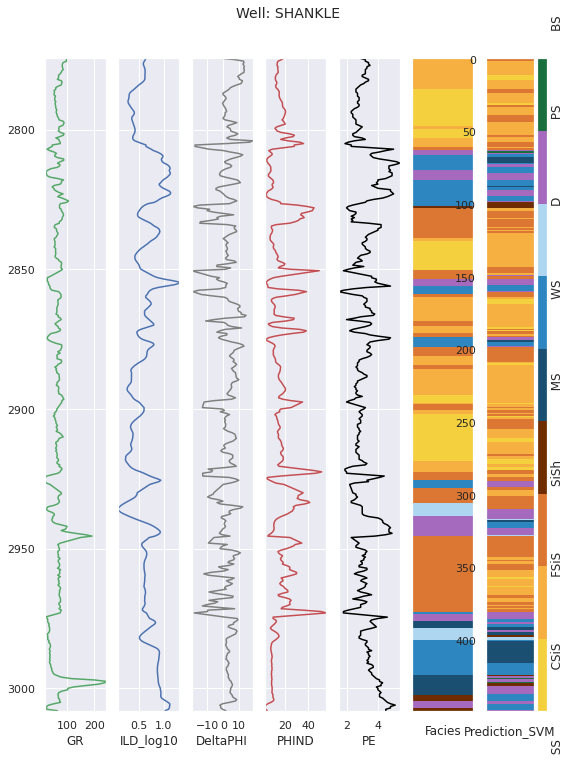

In [ ]:
compare_facies_plot(blind_teste, 'Prediction_SVM', facies_colors)
plt.savefig("shrimplin_prediction_svm.eps",format='eps', dpi=1200)
#files.download("shrimplin_prediction_svm.eps")

## Aplicação do mlp em poço cego

In [ ]:
blind_teste_mlp = blind.copy()
y_blind = blind_teste_mlp['Facies'].values
features = blind_teste_mlp.drop(['Facies','Formation','Well Name','Depth','FaciesLabels'], axis = 1)
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
x_blind = scaler.transform(features)
y_pred = mlp_hiperparametrizado.predict(x_blind)

In [ ]:
blind_teste['Prediction_MLP'] = y_pred

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6


In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.46
Optimized adjacent facies classification accuracy = 0.95


In [ ]:
cv_conf.shape

(9, 9)

In [ ]:
cv_conf

array([[ 8, 80,  1,  0,  0,  0,  0,  0,  0],
       [16, 59, 14,  0,  0,  0,  0,  0,  0],
       [ 3, 53, 60,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  5,  0,  1,  0],
       [ 0,  0,  0, 10,  2,  3,  0,  4,  0],
       [ 0,  0,  2,  4, 11, 43,  0, 11,  0],
       [ 0,  0,  0,  0,  2,  0, 11,  4,  0],
       [ 0,  0,  0,  0,  0, 10,  1, 22,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
facies_labels

['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']

In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS     8    80     1                                        89
     CSiS    16    59    14                                        89
     FSiS     3    53    60           1                           117
     SiSh                       1           5           1           7
       MS                      10     2     3           4          19
       WS                 2     4    11    43          11          71
        D                             2          11     4          17
       PS                                  10     1    22     7    40
       BS                                                           0

Precision  0.30  0.31  0.78  0.07  0.12  0.70  0.92  0.52  0.00  0.52
   Recall  0.09  0.66  0.51  0.14  0.11  0.61  0.65  0.55  0.00  0.46
       F1  0.14  0.42  0.62  0.09  0.11  0.65  0.76  0.54  0.00  0.46


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    88           1                                        89
     CSiS          89                                              89
     FSiS     3         113           1                           117
     SiSh                       1           5           1           7
       MS                            15                 4          19
       WS                 2     4          65                      71
        D                             2          15                17
       PS                                              40          40
       BS                                                           0

Precision  0.97  1.00  0.97  0.20  0.83  0.93  1.00  0.89  0.00  0.95
   Recall  0.99  1.00  0.97  0.14  0.79  0.92  0.88  1.00  0.00  0.95
       F1  0.98  1.00  0.97  0.17  0.81  0.92  0.94  0.94  0.00  0.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:

def compare_facies_plot(logs, compadre,compadre1, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[compadre1].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im3 = ax[7].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-3):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel('Prediction\n SVM')
    ax[7].set_xlabel('Prediction\n MLP')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([]); ax[6].set_yticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

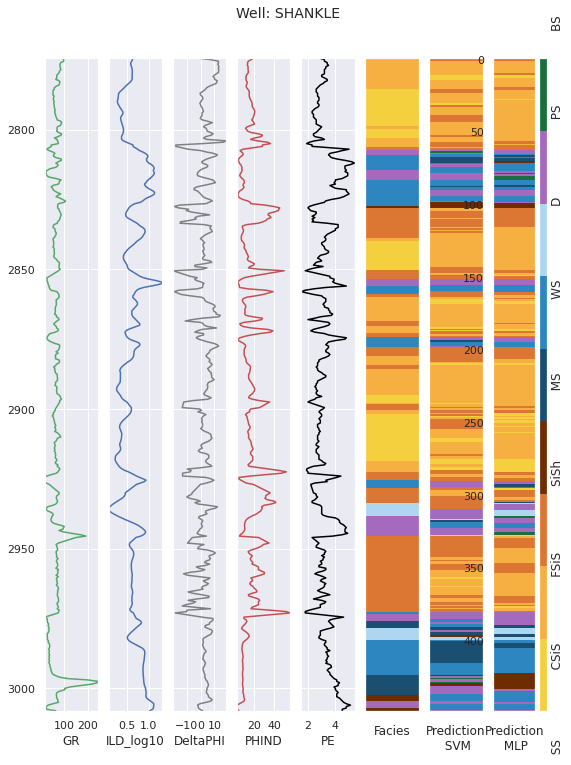

In [ ]:
compare_facies_plot(blind_teste, 'Prediction_SVM','Prediction_MLP', facies_colors)
plt.savefig("shrimplin_prediction_mlp.eps",format='eps', dpi=1200)
#iles.download("shrimplin_prediction_mlp.eps")

## Aplicação do Logistic Regression em poço cego

In [ ]:
#blind_teste_logistic = blind.copy()
y_blind = blind_teste['Facies'].values
features = blind_teste.drop(['Facies','Formation','Well Name','Depth','FaciesLabels','Prediction_SVM','Prediction_MLP'], axis = 1)
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6


In [ ]:
x_blind = scaler.transform(features)
y_pred = logistic_hiperparametrizado.predict(x_blind)

In [ ]:
blind_teste['Prediction_logistic'] = y_pred

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6


In [ ]:
y_blind.shape

(449,)

In [ ]:
y_pred.shape

(449,)

In [ ]:
facies_labels

['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']

In [ ]:
logistic_hiperparametrizado

LogisticRegression(C=1, solver='newton-cg')

In [ ]:
cv_conf_logistic = confusion_matrix(y_blind, y_pred)

In [ ]:
cv_conf_logistic.shape

(8, 8)

In [ ]:
np.zeros((9),dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:

cv_conf_logistic = np.append(cv_conf_logistic,[np.array(np.zeros((8),dtype=int))],axis=0)

In [ ]:
cv_conf_logistic

array([[34, 55,  0,  0,  0,  0,  0,  0],
       [ 4, 75, 10,  0,  0,  0,  0,  0],
       [ 0, 74, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  5,  0,  0],
       [ 0,  0,  0,  6,  2,  9,  0,  2],
       [ 0,  0,  0, 12,  1, 47,  0, 11],
       [ 0,  0,  0,  0,  3,  0, 10,  4],
       [ 0,  0,  0,  1,  5, 11,  0, 23],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
a = np.zeros((9,1), dtype=int)

In [ ]:
a

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
cv_conf_logistic = np.append(cv_conf_logistic,np.zeros((9,1), dtype=int),axis = 1)

In [ ]:
cv_conf_logistic.shape

(9, 9)

In [ ]:
print('Facies classification accuracy = %f' % accuracy(cv_conf_logistic))
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(cv_conf_logistic, adjacent_facies))

Facies classification accuracy = 0.525612
Adjacent facies classification accuracy = 0.937639


In [ ]:
display_cm(cv_conf_logistic, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    34    55                                              89
     CSiS     4    75    10                                        89
     FSiS          74    43                                       117
     SiSh                       2           5                       7
       MS                       6     2     9           2          19
       WS                      12     1    47          11          71
        D                             3          10     4          17
       PS                       1     5    11          23          40
       BS                                                           0

Precision  0.89  0.37  0.81  0.10  0.18  0.65  1.00  0.57  0.00  0.66
   Recall  0.38  0.84  0.37  0.29  0.11  0.66  0.59  0.57  0.00  0.53
       F1  0.54  0.51  0.51  0.14  0.13  0.66  0.74  0.57  0.00  0.53


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
display_adj_cm(cv_conf_logistic, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    89                                                    89
     CSiS          89                                              89
     FSiS               117                                       117
     SiSh                       2           5                       7
       MS                            17                 2          19
       WS                      12          59                      71
        D                             3          14                17
       PS                       1     5                34          40
       BS                                                           0

Precision  1.00  1.00  1.00  0.13  0.68  0.92  1.00  0.94  0.00  0.96
   Recall  1.00  1.00  1.00  0.29  0.89  0.83  0.82  0.85  0.00  0.94
       F1  1.00  1.00  1.00  0.18  0.77  0.87  0.90  0.89  0.00  0.94


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
def compare_facies_plot(logs, compadre,compadre1,compadre2, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[compadre1].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[compadre2].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=9, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im3 = ax[7].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im4 = ax[8].imshow(cluster4, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[8])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-4):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel('Prediction\n SVM')
    ax[7].set_xlabel('Predic-\n tion\n MLP')
    ax[8].set_xlabel('Prediction\n Logistic')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([]); ax[6].set_yticklabels([])
    ax[6].set_xticklabels([])
    ax[7].set_xticklabels([])
    ax[8].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

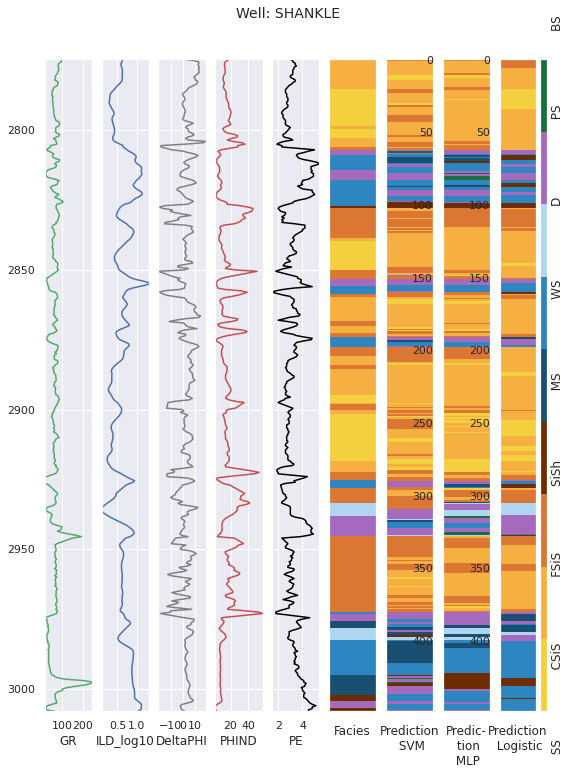

In [ ]:
compare_facies_plot(blind_teste, 'Prediction_SVM','Prediction_MLP','Prediction_logistic', facies_colors)
plt.savefig("shrimplin_prediction_mlp.eps",format='eps', dpi=1200)
#iles.download("shrimplin_prediction_mlp.eps")

## Aplicação do KNN em poço cego

In [ ]:
#blind_teste_knn = blind.copy()
y_blind = blind_teste['Facies'].values
features = blind_teste.drop(['Facies','Formation','Well Name','Depth','FaciesLabels','Prediction_SVM','Prediction_MLP','Prediction_logistic'], axis = 1)
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
x_blind = scaler.transform(features)
y_pred = knn_hiperparametrizado.predict(x_blind)

In [ ]:
blind_teste['Prediction_KNN'] = y_pred

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6


In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.39
Optimized adjacent facies classification accuracy = 0.88


In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    13    58    18                                        89
     CSiS    22    51    16                                        89
     FSiS     2    53    62                                       117
     SiSh                       1           3           3           7
       MS                       2     1     4     2     8     2    19
       WS                 2    11    12    32          14          71
        D                       1           2     3    11          17
       PS                       1     3    19     1    13     3    40
       BS                                                           0

Precision  0.35  0.31  0.63  0.06  0.06  0.53  0.50  0.27  0.00  0.43
   Recall  0.15  0.57  0.53  0.14  0.05  0.45  0.18  0.33  0.00  0.39
       F1  0.21  0.41  0.58  0.09  0.06  0.49  0.26  0.29  0.00  0.39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    71          18                                        89
     CSiS          89                                              89
     FSiS     2         115                                       117
     SiSh                       1           3           3           7
       MS                             7           2     8     2    19
       WS                 2    11          58                      71
        D                       1                16                17
       PS                       1     3                36          40
       BS                                                           0

Precision  0.97  1.00  0.85  0.07  0.70  0.95  0.89  0.77  0.00  0.90
   Recall  0.80  1.00  0.98  0.14  0.37  0.82  0.94  0.90  0.00  0.88
       F1  0.88  1.00  0.91  0.10  0.48  0.88  0.91  0.83  0.00  0.88


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


## Aplicação do Gaussian rbf em poço cego

In [ ]:
y_blind = blind_teste['Facies'].values

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6


In [ ]:
features = blind_teste.drop(['Facies','Formation','Well Name','Depth','FaciesLabels','Prediction_SVM','Prediction_MLP','Prediction_logistic','Prediction_KNN'], axis = 1)

In [ ]:
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
x_blind = scaler.transform(features)

In [ ]:
y_pred = gaussian_rbf_hiperparametrizado.predict(x_blind)

In [ ]:
blind_teste['Prediction_rbf'] = y_pred

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2,3
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6,6


In [ ]:
blind_teste['Prediction_rbf'].unique()

array([3, 2, 1, 8, 6, 5, 4, 7])

In [ ]:
blind_teste['Facies'].unique()

array([2, 1, 3, 8, 6, 4, 7, 5])

In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)

In [ ]:
cv_conf.shape

(8, 8)

In [ ]:
cv_conf = np.append(cv_conf,[np.array(np.zeros((8),dtype=int))],axis=0)

In [ ]:
cv_conf = np.append(cv_conf,np.zeros((9,1), dtype=int),axis = 1)

In [ ]:
cv_conf.shape

(9, 9)

In [ ]:

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.48
Optimized adjacent facies classification accuracy = 0.95


In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    16    72     1                                        89
     CSiS     3    69    17                                        89
     FSiS          70    47                                       117
     SiSh                       1           6                       7
       MS                       9     2     6           2          19
       WS                 1     7     3    51           9          71
        D                             2           9     6          17
       PS                             4    14     1    21          40
       BS                                                           0

Precision  0.84  0.33  0.71  0.06  0.18  0.66  0.90  0.55  0.00  0.61
   Recall  0.18  0.78  0.40  0.14  0.11  0.72  0.53  0.53  0.00  0.48
       F1  0.30  0.46  0.51  0.08  0.13  0.69  0.67  0.54  0.00  0.47


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    88           1                                        89
     CSiS          89                                              89
     FSiS               117                                       117
     SiSh                       1           6                       7
       MS                            17                 2          19
       WS                 1     7          63                      71
        D                             2          15                17
       PS                             4                36          40
       BS                                                           0

Precision  1.00  1.00  0.98  0.12  0.74  0.91  1.00  0.95  0.00  0.95
   Recall  0.99  1.00  1.00  0.14  0.89  0.89  0.88  0.90  0.00  0.95
       F1  0.99  1.00  0.99  0.13  0.81  0.90  0.94  0.92  0.00  0.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


## Aplicação Gaussian Rational Quadratic em poço cego

In [ ]:
#blind_teste = blind.copy()
y_blind = blind_teste['Facies'].values
features = blind_teste.drop(['Facies','Formation','Well Name','Depth','FaciesLabels','Prediction_SVM','Prediction_MLP','Prediction_logistic','Prediction_KNN','Prediction_rbf'], axis = 1)
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
x_blind = scaler.transform(features)
y_pred = gaussian_rational_hiperparametrizado.predict(x_blind)

In [ ]:
blind_teste['Prediction_rational'] = y_pred

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf,Prediction_rational
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2,3,3
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3,3,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6,6,6


In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)

In [ ]:
cv_conf

array([[17, 71,  1,  0,  0,  0,  0,  0],
       [ 5, 70, 14,  0,  0,  0,  0,  0],
       [ 0, 52, 65,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  6,  0,  0],
       [ 0,  0,  0, 10,  2,  4,  0,  3],
       [ 0,  0,  1,  6,  0, 54,  0, 10],
       [ 0,  0,  3,  0,  1,  0,  6,  7],
       [ 0,  0,  1,  0,  0, 13,  1, 25]])

In [ ]:
cv_conf.shape

(8, 8)

In [ ]:
cv_conf = np.append(cv_conf,[np.array(np.zeros((8),dtype=int))],axis=0)

In [ ]:
cv_conf = np.append(cv_conf,np.zeros((9,1), dtype=int),axis = 1)

In [ ]:
print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.53
Optimized adjacent facies classification accuracy = 0.95


In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    17    71     1                                        89
     CSiS     5    70    14                                        89
     FSiS          52    65                                       117
     SiSh                       1           6                       7
       MS                      10     2     4           3          19
       WS                 1     6          54          10          71
        D                 3           1           6     7          17
       PS                 1                13     1    25          40
       BS                                                           0

Precision  0.77  0.36  0.76  0.06  0.67  0.70  0.86  0.56  0.00  0.65
   Recall  0.19  0.79  0.56  0.14  0.11  0.76  0.35  0.62  0.00  0.53
       F1  0.31  0.50  0.64  0.08  0.18  0.73  0.50  0.59  0.00  0.52


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    88           1                                        89
     CSiS          89                                              89
     FSiS               117                                       117
     SiSh                       1           6                       7
       MS                            16                 3          19
       WS                 1     6          64                      71
        D                 3           1          13                17
       PS                 1                            39          40
       BS                                                           0

Precision  1.00  1.00  0.95  0.14  0.94  0.91  1.00  0.93  0.00  0.95
   Recall  0.99  1.00  1.00  0.14  0.84  0.90  0.76  0.97  0.00  0.95
       F1  0.99  1.00  0.97  0.14  0.89  0.91  0.87  0.95  0.00  0.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


# 6 Aplicação dos melhores métodos não hiperparametrizados - KNN, Gaussian e MLP

## KNN não hiperparametrizado

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf,Prediction_rational
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2,3,3
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3,3,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6,6,6


In [ ]:
#blind_teste = blind.copy()
y_blind = blind_teste['Facies'].values
features = blind_teste.drop(['Facies','Formation','Well Name','Depth','FaciesLabels','Prediction_SVM','Prediction_MLP','Prediction_logistic','Prediction_KNN','Prediction_rbf','Prediction_rational'], axis = 1)
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
x_blind = scaler.transform(features)
y_pred = knn_classifier.predict(x_blind)

In [ ]:
blind_teste['Prediction_knn_n_hiper'] = y_pred
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf,Prediction_rational,Prediction_knn_n_hiper
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2,3,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2,3,3,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3,3,3,2
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6,6,6,6


In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)

In [ ]:
cv_conf.shape

(9, 9)

In [ ]:
print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.43
Optimized adjacent facies classification accuracy = 0.90


In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    19    65     5                                        89
     CSiS    20    61     8                                        89
     FSiS     1    55    61                                       117
     SiSh                       1           5           1           7
       MS                       2           4     1     7     5    19
       WS                 2     7    10    38          14          71
        D                       2     4     1     6     4          17
       PS                       1     2    23     2     7     5    40
       BS                                                           0

Precision  0.47  0.34  0.80  0.08  0.00  0.54  0.67  0.21  0.00  0.50
   Recall  0.21  0.69  0.52  0.14  0.00  0.54  0.35  0.17  0.00  0.43
       F1  0.29  0.45  0.63  0.10  0.00  0.54  0.46  0.19  0.00  0.43


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    84           5                                        89
     CSiS          89                                              89
     FSiS     1         116                                       117
     SiSh                       1           5           1           7
       MS                             6           1     7     5    19
       WS                 2     7          62                      71
        D                       2     4          11                17
       PS                       1     2                37          40
       BS                                                           0

Precision  0.99  1.00  0.94  0.09  0.50  0.93  0.92  0.82  0.00  0.92
   Recall  0.94  1.00  0.99  0.14  0.32  0.87  0.65  0.93  0.00  0.90
       F1  0.97  1.00  0.97  0.11  0.39  0.90  0.76  0.87  0.00  0.91


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


## Gaussian não hiperparametrizado

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf,Prediction_rational,Prediction_knn_n_hiper
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2,3,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2,3,3,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3,3,3,2
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6,6,6,6


In [ ]:
y_blind = blind_teste['Facies'].values
features = blind_teste.drop(['Facies','Formation','Well Name','Depth','FaciesLabels','Prediction_SVM','Prediction_MLP','Prediction_logistic','Prediction_KNN','Prediction_rbf','Prediction_rational','Prediction_knn_n_hiper'], axis = 1)
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
x_blind = scaler.transform(features)
y_pred = gaussian_classifier.predict(x_blind)

In [ ]:
blind_teste['Prediction_gaussian_n_hiper'] = y_pred
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf,Prediction_rational,Prediction_knn_n_hiper,Prediction_gaussian_n_hiper
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2,3,3,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2,3,3,2,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3,3,3,2,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6,6,6,6,6


In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)
cv_conf.shape

(9, 9)

In [ ]:
print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.52
Optimized adjacent facies classification accuracy = 0.95


In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    20    68     1                                        89
     CSiS     7    71    11                                        89
     FSiS          51    66                                       117
     SiSh                       1           6                       7
       MS                      10     2     4           3          19
       WS                 2     7     9    44           9          71
        D                             2           8     7          17
       PS                             1    15     1    20     3    40
       BS                                                           0

Precision  0.74  0.37  0.82  0.06  0.14  0.64  0.89  0.51  0.00  0.62
   Recall  0.22  0.80  0.56  0.14  0.11  0.62  0.47  0.50  0.00  0.52
       F1  0.34  0.51  0.67  0.08  0.12  0.63  0.62  0.51  0.00  0.52


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    88           1                                        89
     CSiS          89                                              89
     FSiS               117                                       117
     SiSh                       1           6                       7
       MS                            16                 3          19
       WS                 2     7          62                      71
        D                             2          15                17
       PS                             1                39          40
       BS                                                           0

Precision  1.00  1.00  0.97  0.12  0.84  0.91  1.00  0.93  0.00  0.95
   Recall  0.99  1.00  1.00  0.14  0.84  0.87  0.88  0.97  0.00  0.95
       F1  0.99  1.00  0.99  0.13  0.84  0.89  0.94  0.95  0.00  0.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


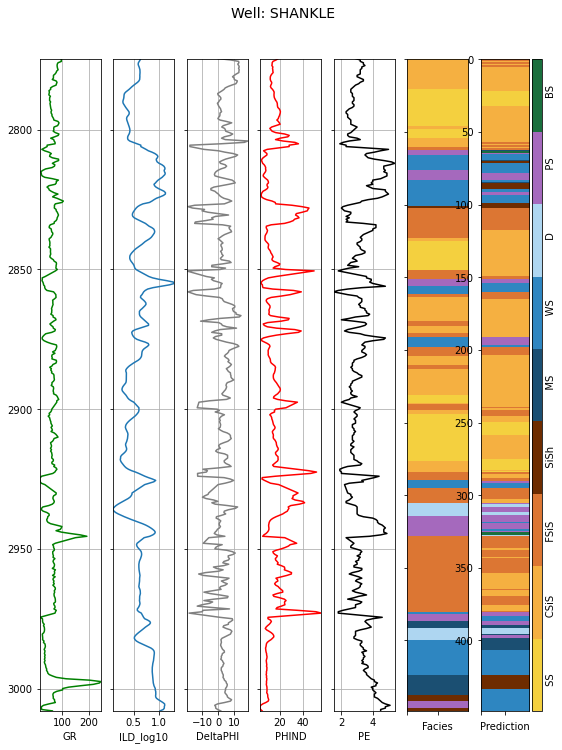

In [ ]:
compare_facies_plot(blind_teste_gaussian, 'Prediction', facies_colors)
plt.savefig("shrimplin_prediction_mlp.eps",format='eps', dpi=1200)
#iles.download("shrimplin_prediction_mlp.eps")

## MLP não hiperparametrizado no poço cego

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf,Prediction_rational,Prediction_knn_n_hiper,Prediction_gaussian_n_hiper
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,1.000,CSiS,2,3,3,2,3,3,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,0.984,CSiS,3,3,3,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,0.968,CSiS,2,2,3,2,3,3,2,2
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,0.952,CSiS,2,2,3,3,3,3,2,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,0.935,CSiS,2,2,3,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,0.060,PS,6,6,6,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.045,PS,6,6,6,6,6,6,6,6
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,0.030,PS,6,6,6,6,6,6,6,6
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,0.030,SiSh,6,6,6,6,6,6,6,6


In [ ]:
y_blind = blind_teste['Facies'].values
features = blind_teste.drop(['Facies','Formation','Well Name','Depth','FaciesLabels','Prediction_SVM','Prediction_MLP','Prediction_logistic','Prediction_KNN','Prediction_rbf','Prediction_rational','Prediction_knn_n_hiper','Prediction_gaussian_n_hiper'], axis = 1)
features

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
937,98.36,0.642,-0.1,18.685,2.9,1,1.000
938,97.57,0.631,7.9,16.745,3.2,1,0.984
939,98.41,0.615,12.8,14.105,3.2,1,0.968
940,85.92,0.597,13.0,13.385,3.4,1,0.952
941,83.16,0.592,12.3,13.345,3.4,1,0.935
...,...,...,...,...,...,...,...
1381,32.84,1.120,-2.2,3.455,5.1,2,0.060
1382,25.16,1.112,-1.6,2.890,4.8,2,0.045
1383,25.16,1.112,-1.6,2.890,4.8,2,0.030
1384,26.22,1.092,-0.4,3.400,4.5,2,0.030


In [ ]:
x_blind = scaler.transform(features)
y_pred = mlp_classifier.predict(x_blind)

In [ ]:
blind_teste['Prediction_mlp_n_hiper'] = y_pred
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,...,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf,Prediction_rational,Prediction_knn_n_hiper,Prediction_gaussian_n_hiper,Prediction_mlp_n_hiper
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,...,CSiS,2,3,3,2,3,3,3,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,...,CSiS,3,3,3,3,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,...,CSiS,2,2,3,2,3,3,2,2,3
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,...,CSiS,2,2,3,3,3,3,2,3,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,...,CSiS,2,2,3,2,3,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,...,PS,6,6,6,6,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,...,PS,6,6,6,6,6,6,6,6,8
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,...,PS,6,6,6,6,6,6,6,6,8
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,...,SiSh,6,6,6,6,6,6,6,6,8


In [ ]:
cv_conf = confusion_matrix(y_blind, y_pred)
cv_conf.shape

(9, 9)

In [ ]:
print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(cv_conf, adjacent_facies))

Optimized facies classification accuracy = 0.52
Optimized adjacent facies classification accuracy = 0.95


In [ ]:
display_cm(cv_conf, facies_labels,
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    28    59     2                                        89
     CSiS     1    69    19                                        89
     FSiS          60    57                                       117
     SiSh                       1           5           1           7
       MS                      10     3     4           2          19
       WS                       6     9    42          14          71
        D                             4          12     1          17
       PS                             1    13     1    21     4    40
       BS                                                           0

Precision  0.97  0.37  0.73  0.06  0.18  0.66  0.92  0.54  0.00  0.65
   Recall  0.31  0.78  0.49  0.14  0.16  0.59  0.71  0.53  0.00  0.52
       F1  0.47  0.50  0.58  0.08  0.17  0.62  0.80  0.53  0.00  0.53


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
display_adj_cm(cv_conf, facies_labels, adjacent_facies,
               display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    87           2                                        89
     CSiS          89                                              89
     FSiS               117                                       117
     SiSh                       1           5           1           7
       MS                            17                 2          19
       WS                       6          65                      71
        D                             4          13                17
       PS                             1                39          40
       BS                                                           0

Precision  1.00  1.00  0.98  0.14  0.77  0.93  1.00  0.93  0.00  0.95
   Recall  0.98  1.00  1.00  0.14  0.89  0.92  0.76  0.97  0.00  0.95
       F1  0.99  1.00  0.99  0.14  0.83  0.92  0.87  0.95  0.00  0.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


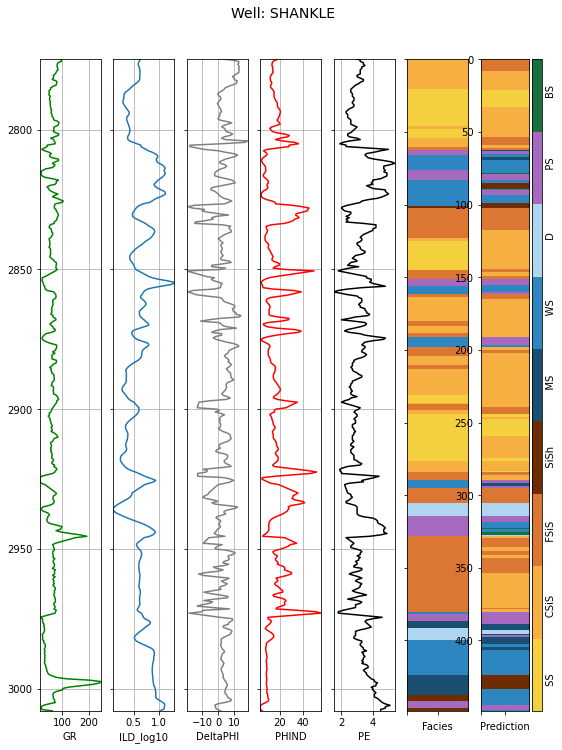

In [ ]:
compare_facies_plot(blind_teste, 'Prediction', facies_colors)
plt.savefig("shrimplin_prediction_mlp.eps",format='eps', dpi=1200)
#iles.download("shrimplin_prediction_mlp.eps")

## Análise qualitativa

In [ ]:
blind_teste

,Depth,Facies,Formation,Well Name,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,...,FaciesLabels,Prediction_SVM,Prediction_MLP,Prediction_logistic,Prediction_KNN,Prediction_rbf,Prediction_rational,Prediction_knn_n_hiper,Prediction_gaussian_n_hiper,Prediction_mlp_n_hiper
937,2774.5,2,A1 SH,SHANKLE,98.36,0.642,-0.1,18.685,2.9,1,...,CSiS,2,3,3,2,3,3,3,3,3
938,2775.0,2,A1 SH,SHANKLE,97.57,0.631,7.9,16.745,3.2,1,...,CSiS,3,3,3,3,3,3,3,3,3
939,2775.5,2,A1 SH,SHANKLE,98.41,0.615,12.8,14.105,3.2,1,...,CSiS,2,2,3,2,3,3,2,2,3
940,2776.0,2,A1 SH,SHANKLE,85.92,0.597,13.0,13.385,3.4,1,...,CSiS,2,2,3,3,3,3,2,3,3
941,2776.5,2,A1 SH,SHANKLE,83.16,0.592,12.3,13.345,3.4,1,...,CSiS,2,2,3,2,3,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,3006.0,8,C LM,SHANKLE,32.84,1.120,-2.2,3.455,5.1,2,...,PS,6,6,6,6,6,6,6,6,6
1382,3006.5,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,...,PS,6,6,6,6,6,6,6,6,8
1383,3007.0,8,C LM,SHANKLE,25.16,1.112,-1.6,2.890,4.8,2,...,PS,6,6,6,6,6,6,6,6,8
1384,3007.5,4,C LM,SHANKLE,26.22,1.092,-0.4,3.400,4.5,2,...,SiSh,6,6,6,6,6,6,6,6,8


In [ ]:
blind_teste.columns

Index(['Depth', 'Facies', 'Formation', 'Well Name', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'FaciesLabels',
       'Prediction_SVM', 'Prediction_MLP', 'Prediction_logistic',
       'Prediction_KNN', 'Prediction_rbf', 'Prediction_rational',
       'Prediction_knn_n_hiper', 'Prediction_gaussian_n_hiper',
       'Prediction_mlp_n_hiper'],
      dtype='object')

In [ ]:
def compare_facies_plot(logs, compadre1,compadre2,compadre3,compadre4,compadre5,compadre6,compadre7,compadre8,compadre9, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre1].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[compadre2].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[compadre3].values,1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs[compadre4].values,1), 100, 1)
    cluster6 = np.repeat(np.expand_dims(logs[compadre5].values,1), 100, 1)
    cluster7 = np.repeat(np.expand_dims(logs[compadre6].values,1), 100, 1)
    cluster8 = np.repeat(np.expand_dims(logs[compadre7].values,1), 100, 1)
    cluster9 = np.repeat(np.expand_dims(logs[compadre8].values,1), 100, 1)
    cluster10 = np.repeat(np.expand_dims(logs[compadre9].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=15, figsize=(15, 15))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im3 = ax[7].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im4 = ax[8].imshow(cluster4, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im5 = ax[9].imshow(cluster5, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im6 = ax[10].imshow(cluster6, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im7 = ax[11].imshow(cluster7, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im8 = ax[12].imshow(cluster8, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im9 = ax[13].imshow(cluster8, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im10 = ax[14].imshow(cluster10, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)


    divider = make_axes_locatable(ax[14])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-10):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel('Predic-\ntion\n SVM')
    ax[7].set_xlabel('Predic-\ntion\n MLP')
    ax[8].set_xlabel('Predic-\ntion\n MLP \n s \n hiper\nparame\ntrização')
    ax[9].set_xlabel('Predic-\ntion\n Logis-\ntic')
    ax[10].set_xlabel('Predic-\ntion\n KNN ')
    ax[11].set_xlabel('Predic-\ntion\n KNN \n s \n hiper-\nparame-\ntrização')
    ax[12].set_xlabel('Predic-\ntion\nGaus-\nsian c \n RBF')
    ax[13].set_xlabel('Predic-\ntion\nGaus\nsian c \n Ratio-\nnal')
    ax[14].set_xlabel('Predic-\ntion\nGaus\nsian \n s \n hiper-\nparame-\ntrização')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([]); ax[6].set_yticklabels([])
    ax[6].set_xticklabels([]); ax[7].set_yticklabels([])
    ax[7].set_xticklabels([]); ax[8].set_yticklabels([])
    ax[8].set_xticklabels([]); ax[9].set_yticklabels([])
    ax[9].set_xticklabels([]); ax[10].set_yticklabels([])
    ax[10].set_xticklabels([]); ax[11].set_yticklabels([])
    ax[11].set_xticklabels([]); ax[12].set_yticklabels([])
    ax[12].set_xticklabels([]); ax[13].set_yticklabels([])
    ax[13].set_xticklabels([]); ax[14].set_yticklabels([])
    ax[14].set_xticklabels([])

    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

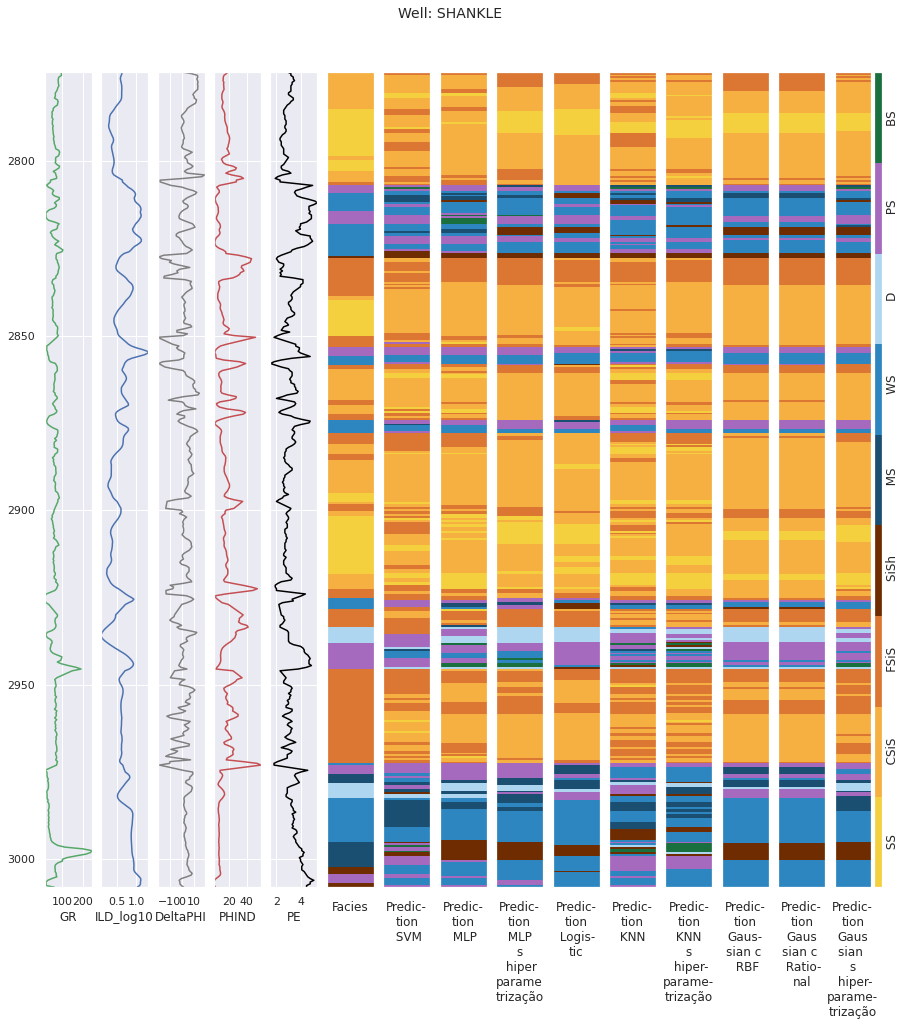

In [ ]:
compare_facies_plot(blind_teste, 'Prediction_SVM', 'Prediction_MLP','Prediction_mlp_n_hiper', 'Prediction_logistic',
       'Prediction_KNN','Prediction_knn_n_hiper', 'Prediction_rbf', 'Prediction_rational','Prediction_gaussian_n_hiper',facies_colors)
plt.savefig("shrimplin_prediction_mlp.eps",format='eps', dpi=1200)
#iles.download("shrimplin_prediction_mlp.eps")

# 6 Aplicação em dados não rotulados

## 6.1 SVM

In [ ]:
data_no_rotulados = pd.read_csv('/Users/CometLake_05/Documents/IsaacNilberto/Ic/facies_classification-master/validation_data_nofacies.csv')

In [ ]:
data_no_rotulados.columns

In [ ]:
data_no_rotulados_svm = data_no_rotulados.copy()

In [ ]:
data_no_rotulados_svm

In [ ]:
data_no_rotulados

In [ ]:
print(data_no_rotulados_svm.head())

In [ ]:
data_no_rotulados_svm['Well Name'] = data_no_rotulados_svm['Well Name'].astype('category')

In [ ]:
features_no_rotulados = data_no_rotulados_svm.drop(['Formation', 'Well Name','Depth'], axis = 1)

In [ ]:
x_desconhecidos_svm = scaler.transform(features_no_rotulados)

In [ ]:
y_desconhecidos_svm = sv_classifier.predict(x_desconhecidos_svm)

In [ ]:
data_no_rotulados_svm['Facies'] = y_desconhecidos_svm

In [ ]:
data_no_rotulados_svm

In [ ]:
make_facies_log_plot(
    data_no_rotulados_svm[data_no_rotulados_svm['Well Name'] == 'STUART'],
    facies_colors=facies_colors)

make_facies_log_plot(
    data_no_rotulados_svm[data_no_rotulados_svm['Well Name'] == 'CRAWFORD'],
    facies_colors=facies_colors)

In [ ]:
conf_svm_desconhecido = confusion_matrix(y_test[0:830],y_desconhecidos_svm)
display_cm(conf_svm_desconhecido, facies_labels, hide_zeros = True)

In [ ]:
conf_svm_desconhecido = confusion_matrix(y_test[0:830],y_desconhecidos_svm)
display_cm(conf_svm_desconhecido, facies_labels, hide_zeros = True, display_metrics = True)

In [ ]:
display_adj_cm(conf_svm_desconhecido,facies_labels, adjacent_facies,
               hide_zeros = True, display_metrics = True)

In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_svm_desconhecido)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_svm_desconhecido,adjacent_facies)}')

## 6.2 MLP

In [ ]:
data_no_rotulados = pd.read_csv('/Users/CometLake_05/Documents/IsaacNilberto/Ic/facies_classification-master/validation_data_nofacies.csv')
data_no_rotulados_mlp = data_no_rotulados
data_no_rotulados_mlp

In [ ]:
data_no_rotulados['Well Name'] = data_no_rotulados['Well Name'].astype('category')

features_no_rotulados_mlp = data_no_rotulados_mlp.drop(['Formation', 'Well Name','Depth'], axis = 1)

x_desconhecidos_mlp = scaler.transform(features_no_rotulados_mlp)

y_desconhecido_mlp = mlp_classifier.predict(x_desconhecidos_mlp)

data_no_rotulados_mlp['Facies']  = y_desconhecido_mlp

data_no_rotulados_mlp

In [ ]:
make_facies_log_plot(
    data_no_rotulados_mlp[data_no_rotulados_mlp['Well Name'] == 'STUART'],
    facies_colors=facies_colors)

make_facies_log_plot(
    data_no_rotulados_mlp[data_no_rotulados_mlp['Well Name'] == 'CRAWFORD'],
    facies_colors=facies_colors)

In [ ]:
conf_mlp_desconhecido = confusion_matrix(y_test[0:830],y_desconhecido_mlp)
display_cm(conf_mlp_desconhecido, facies_labels, hide_zeros = True)

In [ ]:
conf_mlp_desconhecido = confusion_matrix(y_test[0:830],y_desconhecido_mlp)
display_cm(conf_mlp_desconhecido, facies_labels, hide_zeros = True, display_metrics = True)

In [ ]:
display_adj_cm(conf_mlp_desconhecido,facies_labels, adjacent_facies,
               hide_zeros = True, display_metrics = True)

In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_mlp_desconhecido)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_mlp_desconhecido,adjacent_facies)}')

## 6.3 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
data_no_rotulados = pd.read_csv('/Users/CometLake_05/Documents/IsaacNilberto/Ic/facies_classification-master/validation_data_nofacies.csv')
data_no_rotulados_logistic = data_no_rotulados.copy()

In [ ]:
data_no_rotulados_logistic.head()

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911


In [ ]:
data_no_rotulados_logistic['Well Name'] = data_no_rotulados_logistic['Well Name'].astype('category')
features_no_rotulados_logistic = data_no_rotulados_logistic.drop(['Formation', 'Well Name','Depth'], axis =1)

In [ ]:
x_desconhecido_logistic = scaler.transform(features_no_rotulados_logistic)

In [ ]:
y_desconhecido_logistic = logistic_classification.predict(x_desconhecido_logistic)
data_no_rotulados_logistic['Facies'] = y_desconhecido_logistic
data_no_rotulados_logistic.head(10)

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,2
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,2
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,2
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,2
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,2
5,A1 SH,STUART,2810.5,73.955,0.667,6.9,12.25,3.086,1,0.889,2
6,A1 SH,STUART,2811.0,77.962,0.674,6.5,12.45,3.092,1,0.867,2
7,A1 SH,STUART,2811.5,83.894,0.667,6.3,12.65,3.123,1,0.844,2
8,A1 SH,STUART,2812.0,84.424,0.653,6.7,13.05,3.121,1,0.822,2
9,A1 SH,STUART,2812.5,83.160,0.642,7.3,12.95,3.127,1,0.800,2


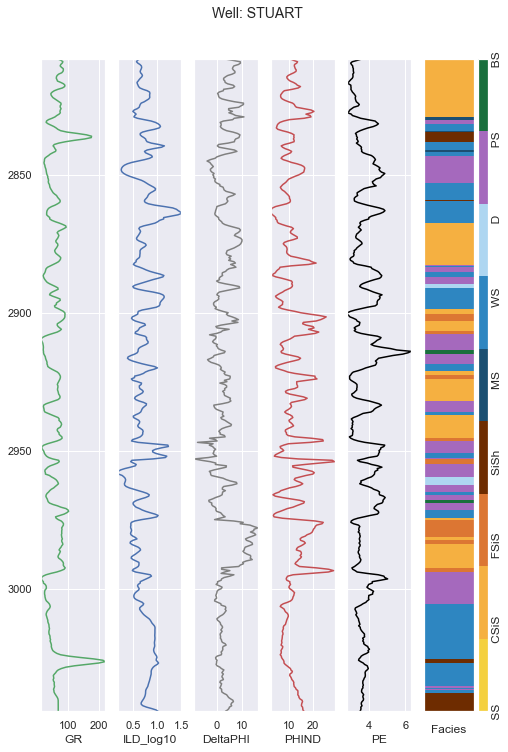

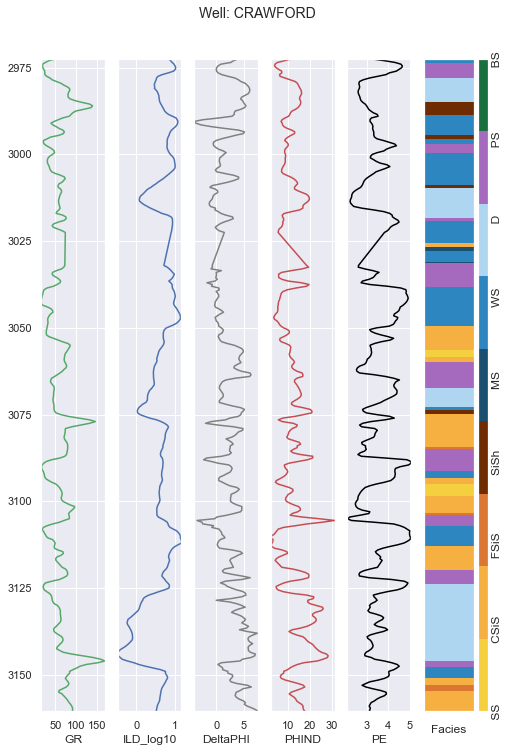

In [ ]:
make_facies_log_plot(
    data_no_rotulados_logistic[data_no_rotulados_logistic['Well Name'] == 'STUART'],
    facies_colors=facies_colors)

make_facies_log_plot(
    data_no_rotulados_logistic[data_no_rotulados_logistic['Well Name'] == 'CRAWFORD'],
    facies_colors=facies_colors)

In [ ]:
conf_logistic_desconhecido = confusion_matrix(y_test[0:830],y_desconhecido_logistic)
display_cm(conf_logistic_desconhecido, facies_labels, hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS     2    20     1     4          15     4    12     1    59
     CSiS     1    52    14    10     2    46    19    43     1   188
     FSiS     1    46     6     5     1    49    15    30     1   154
     SiSh     1    14           5          16     7    10          53
       MS     3    12     6     1     1     6    12    13          54
       WS     1    27     4     6     2    41    14    32     1   128
        D           8     1     2           1     2     6          20
       PS     1    29     6     2     1    41    14    36         130
       BS     1     8     2     2     1    20     3     6     1    44

Precision  0.18  0.24  0.15  0.14  0.12  0.17  0.02  0.19  0.20  0.18
   Recall  0.03  0.28  0.04  0.09  0.02  0.32  0.10  0.28  0.02  0.18
       F1  0.06  0.26  0.06  0.11  0.03  0.23  0.04  0.23  0.04  0.16


In [ ]:
display_adj_cm(conf_logistic_desconhecido,facies_labels, adjacent_facies,
               hide_zeros = True, display_metrics = True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    22           1     4          15     4    12     1    59
     CSiS          67          10     2    46    19    43     1   188
     FSiS     1          52     5     1    49    15    30     1   154
     SiSh     1    14           5          16     7    10          53
       MS     3    12     6           8          12    13          54
       WS     1    27     4     6          89                 1   128
        D           8     1     2                 9                20
       PS     1    29     6     2     1                91         130
       BS     1     8     2     2     1    20                10    44

Precision  0.73  0.41  0.72  0.14  0.62  0.38  0.14  0.46  0.71  0.50
   Recall  0.37  0.36  0.34  0.09  0.15  0.70  0.45  0.70  0.23  0.43
       F1  0.49  0.38  0.46  0.11  0.24  0.49  0.21  0.55  0.34  0.41


In [ ]:
print(f'A acurácia da classificação de fáceis é {accuracy(conf_logistic_desconhecido)}. \n',
       f'A acurácia da classificação de fáceis adjacentes é {accuracy_adjacent(conf_logistic_desconhecido,adjacent_facies)}')

A acurácia da classificação de fáceis é 0.17590361445783131. 
 A acurácia da classificação de fáceis adjacentes é 0.42530120481927713
